## 1 ) Importing necessary libraries

In [3659]:
import pandas as pd 
import numpy as np
import seaborn as sns # for charts
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=ImportWarning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import math
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedKFold
from scipy.stats import skew
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


## 2 ) Reading Data

In [3660]:
tnp=pd.read_csv('Predict Health Outcomes of Horses_train.csv',na_values="None")
org=pd.read_csv('horse.csv',na_values="None")
df = pd.concat([tnp,org], axis=0)
print("Full train dataset shape is {}".format(df.shape))
test=pd.read_csv('Predict Health Outcomes of Horses_test.csv',na_values="None")
print("Full test dataset shape is  {}".format(test.shape))

Full train dataset shape is (1534, 29)
Full test dataset shape is  (824, 28)


In [3661]:
df.head(10)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0.0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1.0,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2.0,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3.0,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4.0,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,5.0,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,6.0,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,7.0,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,...,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,8.0,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,...,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived
9,9.0,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,...,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died


In [3662]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [3663]:
df = df.drop('id', axis=1)
df.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived


We will drop the Id column as it is not necessary for model training.



In [3664]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hospital_number,1534.0,980469.409387,1.392849e+06,518476.0,528806.0,529840.0,534259.25,5305629.0
rectal_temp,1474.0,38.196744,7.798830e-01,35.4,37.8,38.2,38.60,40.8
pulse,1510.0,78.194702,2.916252e+01,30.0,52.0,72.0,96.00,184.0
respiratory_rate,1476.0,30.120596,1.665080e+01,8.0,18.0,28.0,36.00,96.0
nasogastric_reflux_ph,1288.0,4.395963,1.939516e+00,1.0,2.0,4.5,6.20,7.5
packed_cell_volume,1505.0,49.011296,1.059043e+01,23.0,42.0,48.0,55.00,75.0
total_protein,1501.0,21.899534,2.681306e+01,3.3,6.6,7.5,13.00,89.0
abdomo_protein,1336.0,3.271931,1.621415e+00,0.1,2.0,3.0,4.30,10.1
lesion_1,1534.0,3798.817471,5.429908e+03,0.0,2124.0,2209.0,3205.00,41110.0
lesion_2,1534.0,29.409387,3.367483e+02,0.0,0.0,0.0,0.00,7111.0


In [3665]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1531 non-null   object 
 1   age                    1531 non-null   object 
 2   hospital_number        1531 non-null   int64  
 3   rectal_temp            1471 non-null   float64
 4   pulse                  1507 non-null   float64
 5   respiratory_rate       1473 non-null   float64
 6   temp_of_extremities    1436 non-null   object 
 7   peripheral_pulse       1402 non-null   object 
 8   mucous_membrane        1463 non-null   object 
 9   capillary_refill_time  1493 non-null   object 
 10  pain                   1432 non-null   object 
 11  peristalsis            1467 non-null   object 
 12  abdominal_distention   1452 non-null   object 
 13  nasogastric_tube       1348 non-null   object 
 14  nasogastric_reflux     1404 non-null   object 
 15  naso

In [3666]:
df.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       95
peripheral_pulse         129
mucous_membrane           68
capillary_refill_time     38
pain                      99
peristalsis               64
abdominal_distention      79
nasogastric_tube         183
nasogastric_reflux       127
nasogastric_reflux_ph    246
rectal_exam_feces        292
abdomen                  329
packed_cell_volume        29
total_protein             33
abdomo_appearance        213
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

 ## 3 ) target variable distrubution

count      1531
unique        3
top       lived
freq        752
Name: outcome, dtype: object


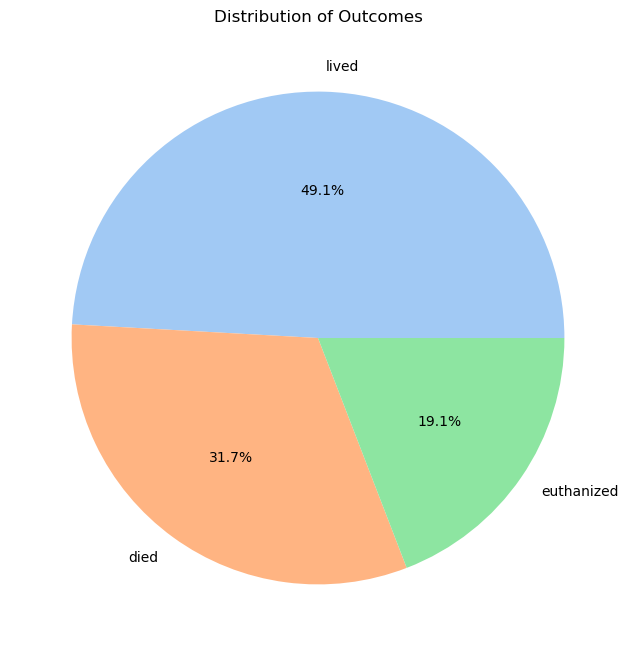

In [3667]:
print(df['outcome'].describe())

outcome_counts = df['outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Outcomes')
plt.show()

the label "lived" occurs most frequently, while "euthanized" is the least frequently occurring label . As shown in the diagram the data is imbalanced


## 4 ) Exploratory data analysis

### 4.1 ) Exploring Feature Types 

In [3668]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    return sum

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
surgery,object,0,0.000000,2,1531
age,object,0,0.000000,2,1531
hospital_number,int64,0,0.000000,288,1531
rectal_temp,float64,60,0.039190,43,1471
pulse,float64,24,0.015676,52,1507
respiratory_rate,float64,58,0.037884,40,1473
temp_of_extremities,object,95,0.062051,4,1436
peripheral_pulse,object,129,0.084259,4,1402
mucous_membrane,object,68,0.044415,6,1463
capillary_refill_time,object,38,0.024820,3,1493


In [3669]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [3670]:
cat_features = [col for col in df.columns if df[col].dtypes == 'object']
df_catg = df.select_dtypes(include = ['O'])
num_features = [col for col in df.columns if df[col].dtypes != 'object' and col != 'outcome']
df_num = df.select_dtypes(include = ['float64', 'int64'])
print("The number of categorical colunms = {} \nThe number of numerical colunms   = {}".format(len(cat_features), len(num_features)))

The number of categorical colunms = 17 
The number of numerical colunms   = 11


### 4.2 ) Numerical data exploration


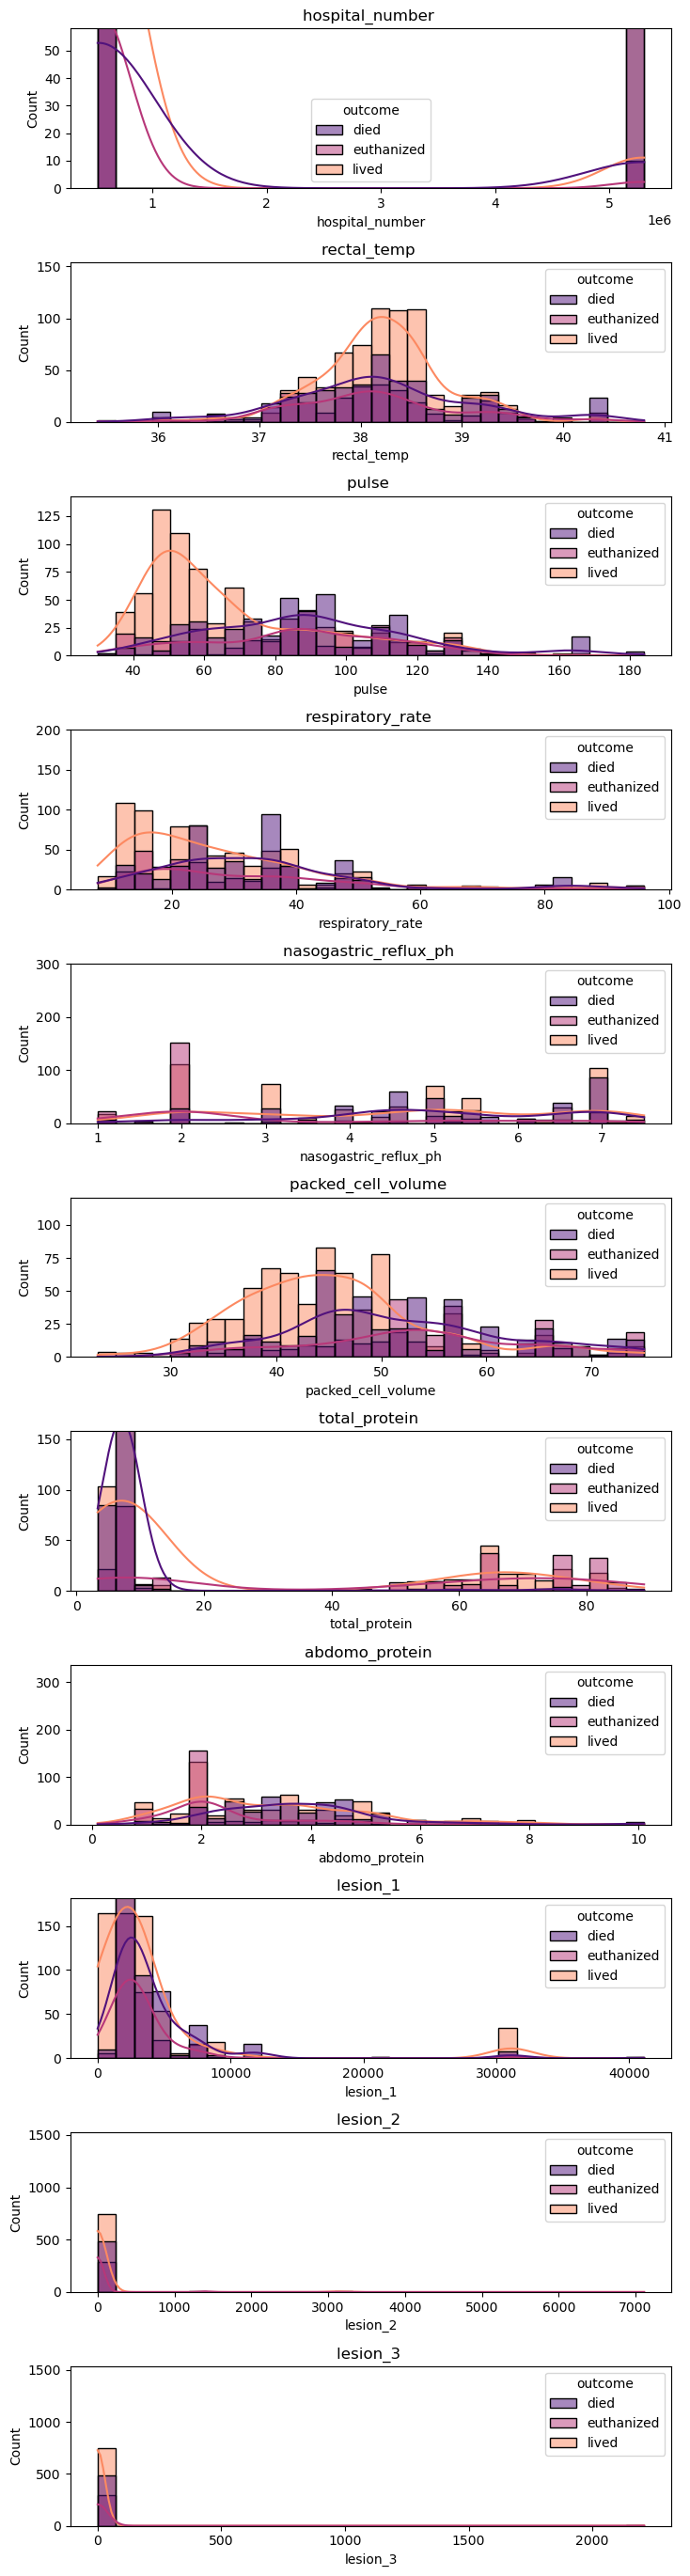

In [3671]:
plt.figure(figsize=(14, len(num_features) * 2.5))

for idx, column in enumerate(num_features):
    # Plotting for outcome
    
#     print( df[column].value_counts())

    plt.subplot(len(num_features), 2, idx*2+1)
    sns.histplot(x=column, hue="outcome", data=df, bins=30, kde=True, palette='magma')
    plt.title(f"{column} ")
    plt.ylim(0, df[column].value_counts().max() + 10)
    
plt.tight_layout()
plt.show()

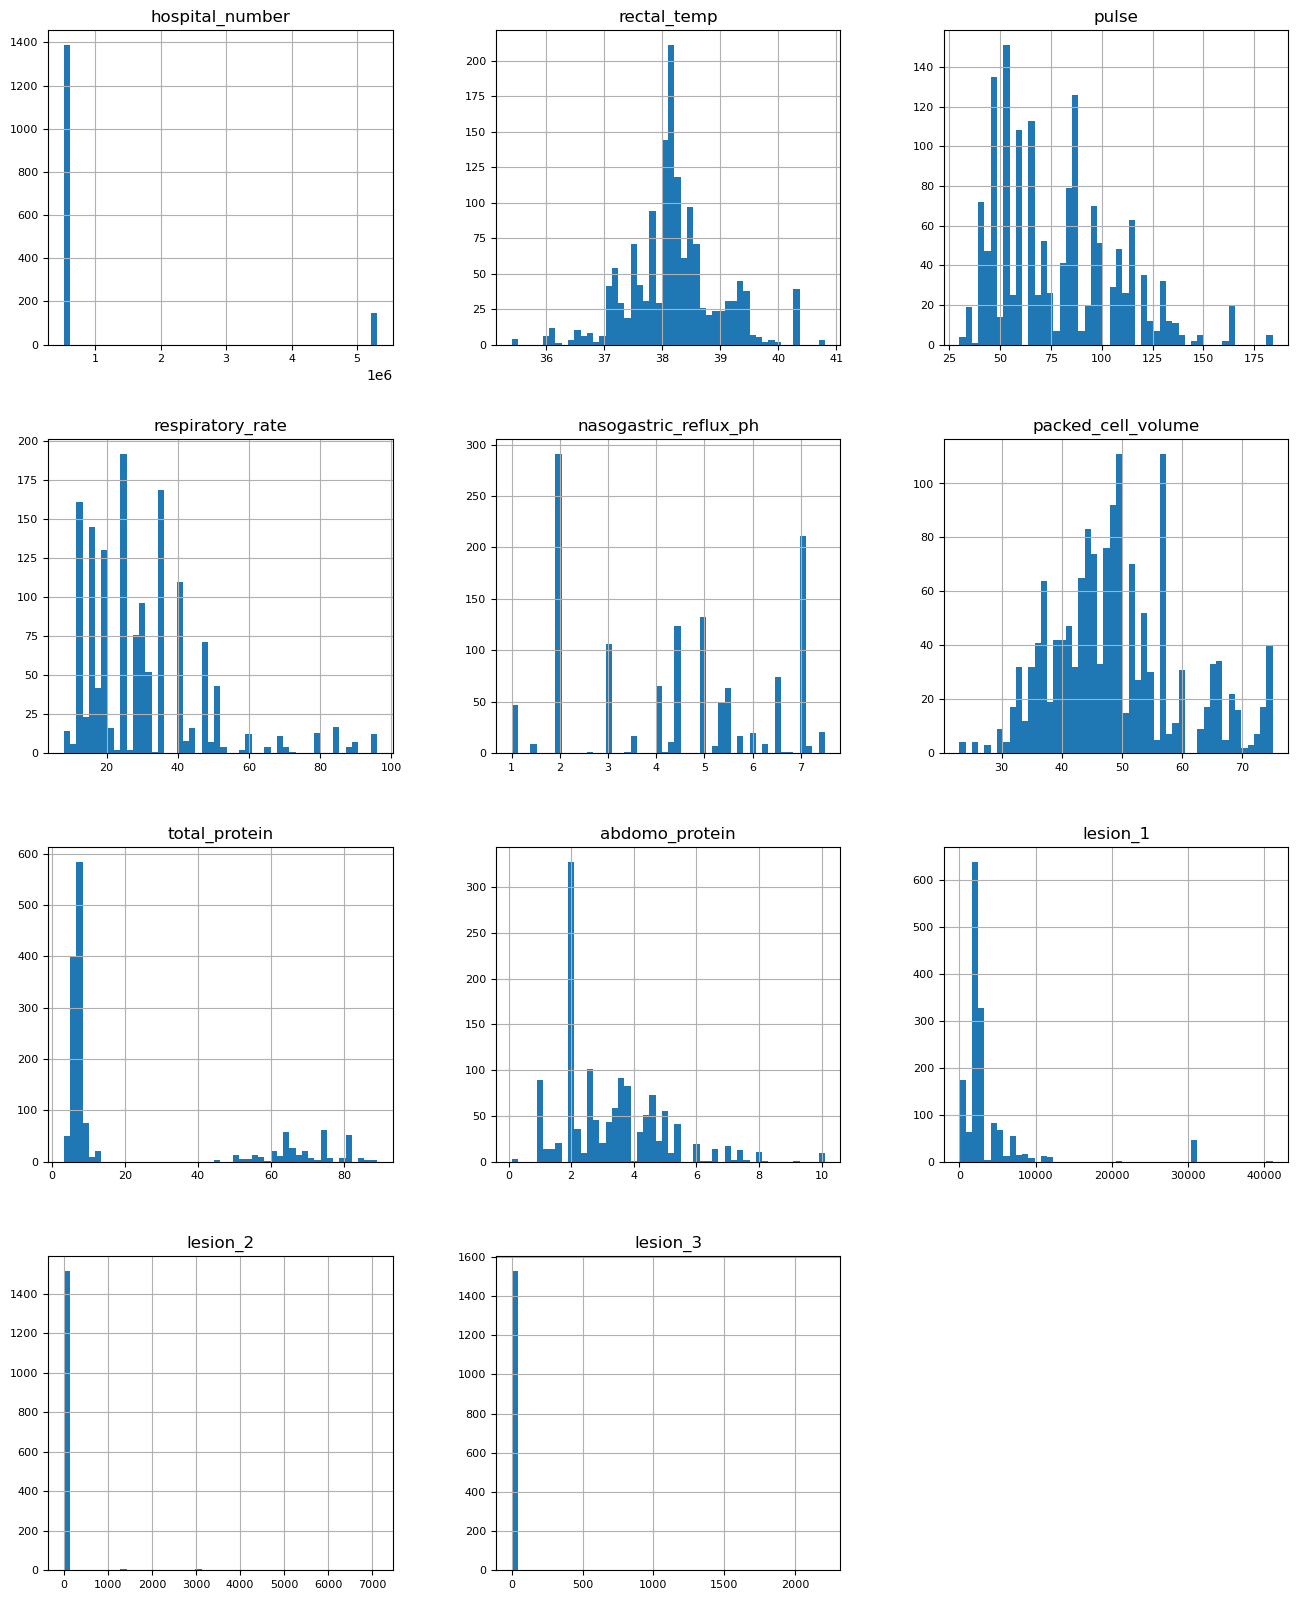

In [3672]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [3673]:
print( df_num['lesion_1'].value_counts())
print( df_num['lesion_2'].value_counts())
print( df_num['lesion_3'].value_counts())

2208    171
0       150
3205    145
3111    122
2205    117
       ... 
4122      1
7113      1
3400      1
4111      1
9000      1
Name: lesion_1, Length: 62, dtype: int64
0       1516
1400       5
3111       5
3112       3
7111       1
6112       1
Name: lesion_2, dtype: int64
0       1528
2209       3
Name: lesion_3, dtype: int64


In [3674]:
df_num[(df_num['lesion_3'] > 0)]

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
58,533887,38.2,88.0,24.0,2.0,66.0,64.0,2.0,4205,3111,2209
705,528461,38.0,112.0,44.0,4.4,60.0,6.1,2.8,4205,3111,2209
1461,534597,38.5,120.0,70.0,NaN,35.0,54.0,1.0,4205,3111,2209


In [3675]:
df_num[(df_num['lesion_2'] > 0)]

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
43,535196,38.0,130.0,16.0,2.0,52.0,65.0,2.0,3205,1400,0
58,533887,38.2,88.0,24.0,2.0,66.0,64.0,2.0,4205,3111,2209
76,529427,37.5,88.0,24.0,4.0,69.0,8.2,5.0,3111,3112,0
105,5283431,38.0,54.0,24.0,7.0,41.0,7.5,6.0,3112,3112,0
311,534293,38.2,130.0,48.0,2.0,65.0,82.0,2.0,2209,1400,0
523,535163,37.8,78.0,20.0,2.0,37.0,66.0,2.0,2207,1400,0
705,528461,38.0,112.0,44.0,4.4,60.0,6.1,2.8,4205,3111,2209
1015,534787,38.2,36.0,16.0,2.0,52.0,75.0,2.0,2209,1400,0
1296,534293,38.2,130.0,16.0,NaN,65.0,82.0,2.0,2209,1400,0
1344,533736,38.3,40.0,16.0,NaN,38.0,58.0,2.0,3111,7111,0


We should consider removing these two columns from the dataset since they contain only 1% of the data, and some of their values are also present in the 'lesion1' column. Removing them could potentially eliminate redundancy and improve the overall dataset."

In [3676]:
df_num['lesion_1'] = df_num['lesion_1'].astype(str)
site_mapping = {
    '1': 'Gastric',
    '2': 'Small Intestine',
    '3': 'Large Colon',
    '4': 'Large Colon and Cecum',
    '5': 'Cecum',
    '6': 'Transverse Colon',
    '7': 'Rectum/Descending Colon',
    '8': 'Uterus',
    '9': 'Bladder',
    '11': 'All Intestinal Sites',
    '00': 'None',
}

type_mapping = {
    '1': 'Simple',
    '2': 'Strangulation',
    '3': 'Inflammation',
    '4': 'Other',
}

subtype_mapping = {
    '1': 'Mechanical',
    '2': 'Paralytic',
    '0': 'N/A',
}

specific_mapping = {
    '1': 'Obturation',
    '2': 'Intrinsic',
    '3': 'Extrinsic',
    '4': 'Adynamic',
    '5': 'Volvulus/Torsion',
    '6': 'Intussuption',
    '7': 'Thromboembolic',
    '8': 'Hernia',
    '9': 'Lipoma/Splenic Incarceration',
    '10': 'Displacement',
    '0': 'N/A',
}
# Translate the 'lesion_1' column using the dictionaries
df_catg['site'] = df_num['lesion_1'].str[0].map(site_mapping)
df_catg['type'] = df_num['lesion_1'].str[1].map(type_mapping)
df_catg['subtype'] = df_num['lesion_1'].str[2].map(subtype_mapping)
df_catg['specific_code'] = df_num['lesion_1'].str[3].map(specific_mapping)


In [3677]:
df['site'] = df_num['lesion_1'].str[0].map(site_mapping)
df['type'] = df_num['lesion_1'].str[1].map(type_mapping)
df['subtype'] = df_num['lesion_1'].str[2].map(subtype_mapping)
df['specific_code'] = df_num['lesion_1'].str[3].map(specific_mapping)


 Based on the provided explanation in the orginal dataset :
 
- The first number represents the site of the lesion, with various numeric codes indicating different anatomical locations.
- The second number represents the type of lesion, categorizing it as "simple," "strangulation," "inflammation," or "other."
- The third number represents the subtype of the lesion, distinguishing between "mechanical," "paralytic," or "n/a" (not applicable).
- The fourth number represents a specific code or cause for the lesion, such as "obturation," "intrinsic," "extrinsic," and so on.

In [3678]:
columns_to_drop = ['lesion_1', 'lesion_2','lesion_3']
df_num = df_num.drop(columns=columns_to_drop, axis=1)

In [3679]:
df_num['Frequency'] = df_num['hospital_number'].map(df['hospital_number'].value_counts())
df_num = df_num.drop('hospital_number', axis=1)
# Display the DataFrame with the new 'Frequency' column
df_num

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,Frequency
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,16
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,10
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,2
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,3
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,7
...,...,...,...,...,...,...,...,...
1526,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3
1527,37.2,72.0,24.0,NaN,44.0,NaN,3.3,6
1528,37.5,72.0,30.0,NaN,60.0,6.8,NaN,7
1529,36.5,100.0,24.0,NaN,50.0,6.0,3.4,8


the case number assigned to the horse (may not be unique if the horse is treated > 1 time)

In [3680]:
df[(df['pulse'] > 80)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,site,type,subtype,specific_code
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,yes,2209,0,0,no,died,Small Intestine,Strangulation,N/A,Lipoma/Splenic Incarceration
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,yes,2208,0,0,no,euthanized,Small Intestine,Strangulation,N/A,Hernia
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,yes,5124,0,0,no,lived,Cecum,Simple,Paralytic,Adynamic
7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,more_3_sec,...,yes,2207,0,0,yes,died,Small Intestine,Strangulation,N/A,Thromboembolic
9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,less_3_sec,...,yes,3209,0,0,yes,died,Large Colon,Strangulation,N/A,Lipoma/Splenic Incarceration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,yes,young,5297159,38.8,150.0,50.0,normal,reduced,dark_cyanotic,more_3_sec,...,yes,4207,0,0,no,died,Large Colon and Cecum,Strangulation,N/A,Thromboembolic
1517,no,adult,5275212,37.8,82.0,12.0,cool,normal,normal_pink,more_3_sec,...,yes,2205,0,0,no,euthanized,Small Intestine,Strangulation,N/A,Volvulus/Torsion
1518,no,young,5305129,39.5,84.0,30.0,NaN,NaN,NaN,less_3_sec,...,no,0,0,0,no,lived,NaN,NaN,NaN,NaN
1526,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,no,3205,0,0,no,euthanized,Large Colon,Strangulation,N/A,Volvulus/Torsion


- is a reflection of the heart condition: 30 -40 is normal for adults
- animals with painful lesions or suffering from circulatory shock may have an elevated heart rate

In [3681]:
df_catg['circulatory_shock'] = (df['pulse'] > 50) & (df['packed_cell_volume'] > 50)
df_catg['dehydrated'] = (df['total_protein'] > 7.5) & (df['packed_cell_volume'] > 50)
df_catg['painful_lesions'] = (df['pulse'] > 50) & (df['packed_cell_volume'] < 50)

- animals with painful lesions or suffering from circulatory shock may have an elevated heart rate

packed cell volume :
- the # of red cells by volume in the blood
- normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.
 
 total protein :
- normal values lie in the 6-7.5 (gms/dL) range
- the higher the value the greater the dehydration


In [3682]:
df_catg['dehydrated'].value_counts()

False    1182
True      349
Name: dehydrated, dtype: int64

In [3683]:
df_num.isna().sum()

rectal_temp               60
pulse                     24
respiratory_rate          58
nasogastric_reflux_ph    246
packed_cell_volume        29
total_protein             33
abdomo_protein           198
Frequency                  0
dtype: int64

In [3684]:
df_num.columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein', 'Frequency'],
      dtype='object')

In [3685]:
# Assuming df is your DataFrame with missing values
# Replace NaNs with np.nan to indicate missing values (fancyimpute requires np.nan)
df_num[df_num.isnull()] = np.nan

# Perform KNN regression imputation
knn_imputer = KNN(k=5)  # You can adjust the number of neighbors (k) as needed
df_imputed = knn_imputer.fit_transform(df_num)

# Convert the result back to a DataFrame (if necessary)
df_num = pd.DataFrame(df_imputed, columns=df_num.columns)

Imputing row 1/1531 with 0 missing, elapsed time: 0.321
Imputing row 101/1531 with 0 missing, elapsed time: 0.322
Imputing row 201/1531 with 0 missing, elapsed time: 0.322
Imputing row 301/1531 with 0 missing, elapsed time: 0.323
Imputing row 401/1531 with 0 missing, elapsed time: 0.323
Imputing row 501/1531 with 0 missing, elapsed time: 0.323
Imputing row 601/1531 with 0 missing, elapsed time: 0.324
Imputing row 701/1531 with 0 missing, elapsed time: 0.324
Imputing row 801/1531 with 0 missing, elapsed time: 0.325
Imputing row 901/1531 with 0 missing, elapsed time: 0.325
Imputing row 1001/1531 with 0 missing, elapsed time: 0.326
Imputing row 1101/1531 with 0 missing, elapsed time: 0.326
Imputing row 1201/1531 with 0 missing, elapsed time: 0.327
Imputing row 1301/1531 with 2 missing, elapsed time: 0.330
Imputing row 1401/1531 with 1 missing, elapsed time: 0.333
Imputing row 1501/1531 with 2 missing, elapsed time: 0.336


In [3686]:
df_num.isna().sum()

rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
Frequency                0
dtype: int64

null values were imputed using KNN

In [3687]:
numerical_column_names = df_num.columns.tolist()
numerical_column_names

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'Frequency']

In [3688]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Select the numerical columns from the DataFrame
numerical_columns = df_num[numerical_column_names]

# Fit and transform the scaler on the selected columns
normalized_numerical_columns = scaler.fit_transform(numerical_columns)

# Replace the original columns with the normalized values
df_num[numerical_column_names] = normalized_numerical_columns

### 4.3 ) Categorical data exploration


In [3689]:
df_catg.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,...,surgical_lesion,cp_data,outcome,site,type,subtype,specific_code,circulatory_shock,dehydrated,painful_lesions
0,yes,adult,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,...,yes,no,died,Small Intestine,Strangulation,N/A,Lipoma/Splenic Incarceration,True,True,False
1,yes,adult,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,...,yes,no,euthanized,Small Intestine,Strangulation,N/A,Hernia,False,False,True
2,yes,adult,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,...,yes,no,lived,Cecum,Simple,Paralytic,Adynamic,False,False,True
3,yes,adult,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,...,yes,yes,lived,Small Intestine,Strangulation,N/A,Hernia,True,False,False
4,no,adult,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,...,no,yes,lived,NaN,NaN,NaN,NaN,False,False,True


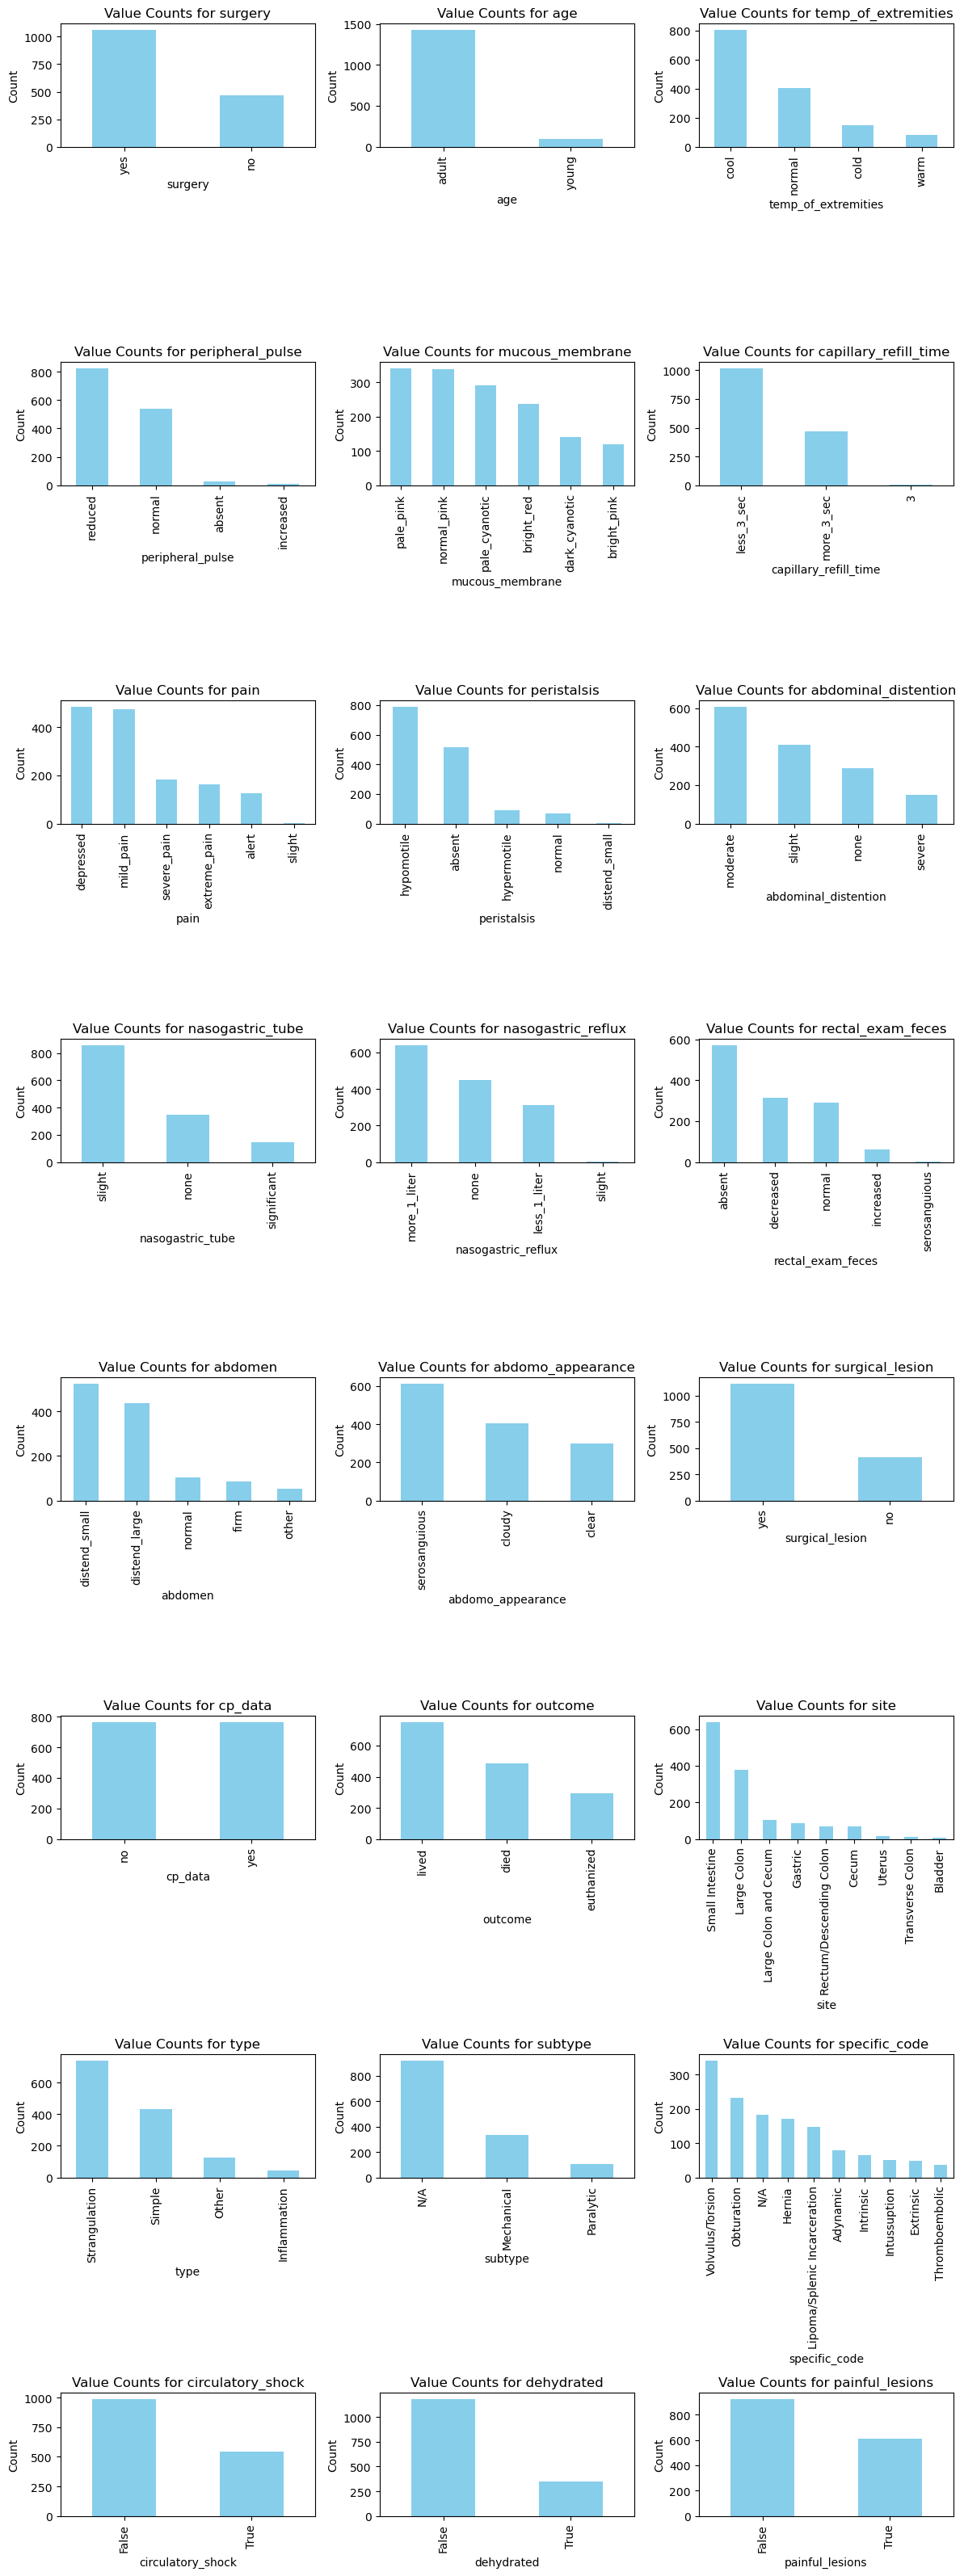

In [3690]:
columns = df_catg.columns

# Assuming df_filtered_categorical contains the filtered categorical columns
num_plots = len(columns)
num_cols_per_row = 3  # Number of plots per row

# Calculate the number of rows needed
num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(12, 4 * num_rows))

# Flatten the axes array to iterate through
axes = axes.flatten()

for i, column in enumerate(columns):
    counts = df_catg[column].value_counts()
    
    # Create a bar plot on the current subplot
    counts.plot(kind='bar', color='skyblue', ax=axes[i])
    
    # Set labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Value Counts for {column}')

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols_per_row):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
fig.tight_layout()
plt.show()


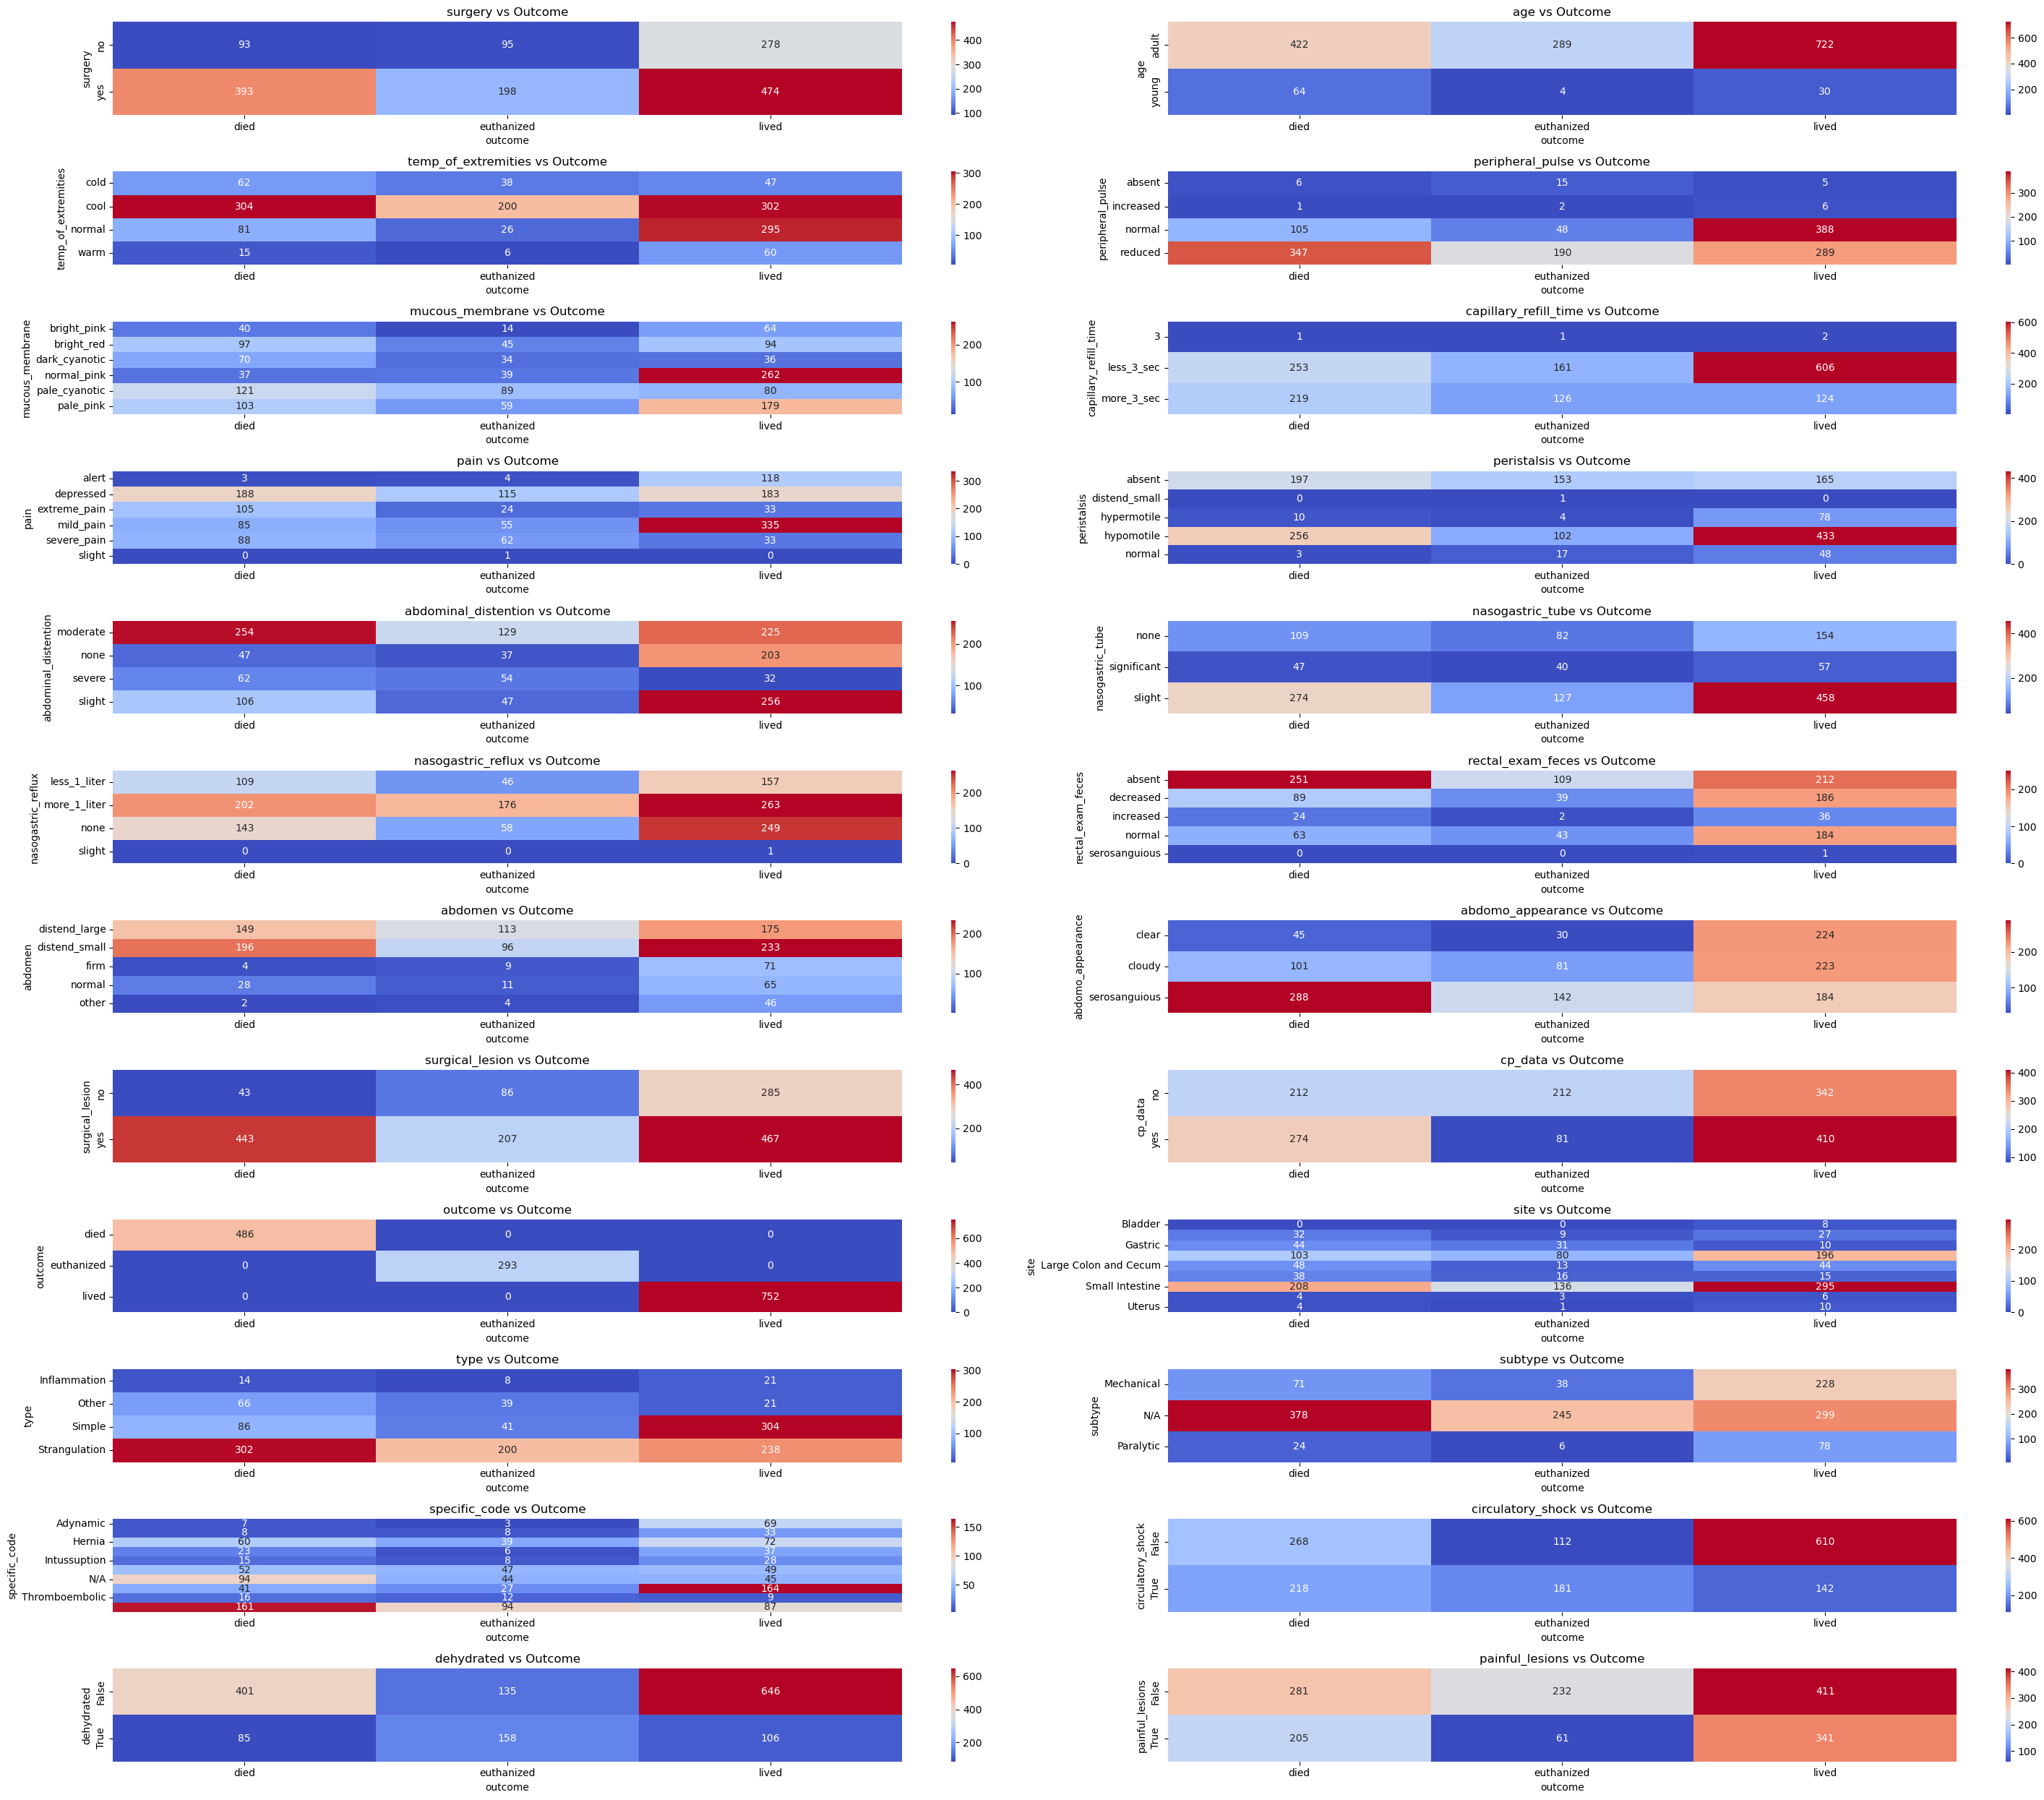

In [3691]:

# Calculate the number of rows and columns needed
num_columns = len(columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(30, 25))

# Iterate over columns and create heatmaps
for i, col in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]

    crosstab = pd.crosstab(df_catg[col], df_catg['outcome'])
    sns.heatmap(data=crosstab, annot=True, cmap='coolwarm', fmt='.0f', ax=ax)
    ax.set_title(f'{col} vs Outcome')

# Remove any empty subplots
for i in range(num_columns, num_rows * 2):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()
plt.show()


In [3692]:
df_catg.isna().sum()

surgery                    0
age                        0
temp_of_extremities       95
peripheral_pulse         129
mucous_membrane           68
capillary_refill_time     38
pain                      99
peristalsis               64
abdominal_distention      79
nasogastric_tube         183
nasogastric_reflux       127
rectal_exam_feces        292
abdomen                  329
abdomo_appearance        213
surgical_lesion            0
cp_data                    0
outcome                    0
site                     150
type                     191
subtype                  164
specific_code            173
circulatory_shock          0
dehydrated                 0
painful_lesions            0
dtype: int64

In [3693]:
df_catg['type'].value_counts()

Strangulation    740
Simple           431
Other            126
Inflammation      43
Name: type, dtype: int64

In [3694]:
df_catg['temp_of_extremities'].fillna(df_catg['temp_of_extremities'].mode()[0], inplace=True)
df_catg['mucous_membrane'].fillna(df_catg['mucous_membrane'].mode()[0], inplace=True)
df_catg['peripheral_pulse'].fillna(df_catg['peripheral_pulse'].mode()[0], inplace=True)
df_catg['capillary_refill_time'].fillna(df_catg['capillary_refill_time'].mode()[0], inplace=True)
df_catg['pain'].fillna(df_catg['pain'].mode()[0], inplace=True)
df_catg['peristalsis'].fillna(df_catg['peristalsis'].mode()[0], inplace=True)
df_catg['abdominal_distention'].fillna(df_catg['abdominal_distention'].mode()[0], inplace=True)
df_catg['nasogastric_tube'].fillna(df_catg['nasogastric_tube'].mode()[0], inplace=True)
df_catg['rectal_exam_feces'].fillna(df_catg['rectal_exam_feces'].mode()[0], inplace=True)
df_catg['nasogastric_reflux'].fillna(df_catg['nasogastric_reflux'].mode()[0], inplace=True)
df_catg['abdomen'].fillna(df_catg['abdomen'].mode()[0], inplace=True)
df_catg['abdomo_appearance'].fillna(df_catg['abdomo_appearance'].mode()[0], inplace=True)
df_catg['site'].fillna(df_catg['site'].mode()[0], inplace=True)
df_catg['type'].fillna('other', inplace=True)
df_catg['subtype'].fillna(df_catg['subtype'].mode()[0], inplace=True)
df_catg['specific_code'].fillna(df_catg['specific_code'].mode()[0], inplace=True)

In [3695]:
df_catg.isna().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
surgical_lesion          0
cp_data                  0
outcome                  0
site                     0
type                     0
subtype                  0
specific_code            0
circulatory_shock        0
dehydrated               0
painful_lesions          0
dtype: int64

**Categorical Data:**
- `pain`,`abdomo_appearance`; *Nominal*
  
  

- `age`,`temp_of_extremities`,`peripheral_pulse`,`capillary_refill_time`,`pain`,`peristalsis`,`abdominal_distention`,`nasogastric_tube`.`nasogastric_reflux`,`rectal_exam_feces`,`abdomen`, `site`,`subtype`,`type`,`specific_code`; *Ordinal*
-  `surgery`,`surgical_lesion`, `cp_data`,`circulatory_shock`,`dehydrated`,`painful_lesions`; *Boolean*

## 5 ) Encoding

### 5.1 ) Nominal

In [3696]:
df["abdomo_appearance"].value_counts()

serosanguious    614
cloudy           405
clear            299
Name: abdomo_appearance, dtype: int64

In [3697]:
df["pain"].value_counts()

depressed       486
mild_pain       475
severe_pain     183
extreme_pain    162
alert           125
slight            1
Name: pain, dtype: int64

In [3698]:
abdomo_appearance=pd.get_dummies(df["abdomo_appearance"])
abdomo_appearance = abdomo_appearance.drop('clear', axis=1)
df_catg=pd.concat([df_catg,abdomo_appearance],axis=1)
df_catg = df_catg.drop('abdomo_appearance', axis=1)

In [3699]:
pain=pd.get_dummies(df["pain"])
pain = pain.drop('slight', axis=1)
pain = pain.drop('alert', axis=1)
df_catg=pd.concat([df_catg,pain],axis=1)
df_catg = df_catg.drop('pain', axis=1)

### 5.2 ) Ordinal

In [3700]:
# Define your custom order for "mucus_membrane"
order_mucus_membrane = ['bright_red',"bright_pink", "normal_pink", "pale_pink", "pale_cyanotic", "dark_cyanotic"]

# Create the OrdinalEncoder with custom categories
mucus_membrane_label = OrdinalEncoder(categories=[order_mucus_membrane])

# Fit and transform the "mucus_membrane" column
df_catg["mucus_membrane_encoded"] = mucus_membrane_label.fit_transform(df_catg[["mucous_membrane"]])
df_catg = df_catg.drop('mucous_membrane', axis=1)

In [3701]:

# Define the order of categories
order_age = ["young", "adult"]

# Create the OrdinalEncoder with custom categories
age_label = OrdinalEncoder(categories=[order_age])

# Fit and transform the "age" column
df_catg["age_encoded"] = age_label.fit_transform(df_catg[["age"]])
df_catg = df_catg.drop('age', axis=1)

In [3702]:

# Define the order of categories
order_temp = ["cold", "cool", "normal", "warm"]

# Create the OrdinalEncoder with custom categories
temp_label = OrdinalEncoder(categories=[order_temp])

# Fit and transform the "temp_of_extremities" column in df_catg
df_catg["temp_encoded"] = temp_label.fit_transform(df_catg[["temp_of_extremities"]])
df_catg = df_catg.drop('temp_of_extremities', axis=1)

In [3703]:

# Define the order of categories
order_pulse = ["absent", "reduced", "normal", "increased"]

# Create the OrdinalEncoder with custom categories
pulse_label = OrdinalEncoder(categories=[order_pulse])

# Fit and transform the "peripheral_pulse" column
df_catg["pulse_encoded"] = pulse_label.fit_transform(df_catg[["peripheral_pulse"]])
df_catg = df_catg.drop('peripheral_pulse', axis=1)

In [3704]:
# Define the order of categories
order_refill = ["3", "less_3_sec", "more_3_sec"]

# Create the OrdinalEncoder with custom categories
refill_label = OrdinalEncoder(categories=[order_refill])

# Fit and transform the "capillary_refill_time" column
df_catg["refill_encoded"] = refill_label.fit_transform(df_catg[["capillary_refill_time"]])
df_catg = df_catg.drop('capillary_refill_time', axis=1)

In [3705]:
# Define the order of categories
order_peristalsis = ["distend_small", "absent", "hypermotile", "normal", "hypomotile"]

# Create the OrdinalEncoder with custom categories
peristalsis_label = OrdinalEncoder(categories=[order_peristalsis])

df_catg["peristalsis_encoded"] = peristalsis_label.fit_transform(df_catg[["peristalsis"]])
df_catg = df_catg.drop('peristalsis', axis=1)

In [3706]:
# Define the order of categories
order_distention = ["none", "slight", "moderate", "severe"]

# Create the OrdinalEncoder with custom categories
distention_label = OrdinalEncoder(categories=[order_distention])

# Fit and transform the "abdominal_distention" column
df_catg["distention_encoded"] = distention_label.fit_transform(df_catg[["abdominal_distention"]])
df_catg = df_catg.drop('abdominal_distention', axis=1)

In [3707]:

# Define the order of categories
order_tube = ["none", "slight", "significant"]

# Create the OrdinalEncoder with custom categories
tube_label = OrdinalEncoder(categories=[order_tube])

# Fit and transform the "nasogastric_tube" column
df_catg["tube_encoded"] = tube_label.fit_transform(df_catg[["nasogastric_tube"]])
df_catg = df_catg.drop('nasogastric_tube', axis=1)

In [3708]:
# Define a custom mapping of categories to danger levels
reflux_mapping = {
    'none': 0,
    'slight': 0,
    'less_1_liter': 1,
    'more_1_liter': 2,

}

# Map the "site" column using the custom mapping
df_catg['nasogastric_reflux'] = df_catg['nasogastric_reflux'].map(reflux_mapping)


In [3709]:

# Define the order of categories
order_abdomen = ["other", "firm", "normal", "distend_large", "distend_small"]

# Create the OrdinalEncoder with custom categories
abdomen_label = OrdinalEncoder(categories=[order_abdomen])

# Fit and transform the "abdomen" column
df_catg["abdomen_encoded"] = abdomen_label.fit_transform(df_catg[["abdomen"]])
df_catg = df_catg.drop('abdomen', axis=1)

In [3710]:

# Define the order of categories
order_exam_feces = ["serosanguious", "decreased", "normal", "increased", "absent"]

# Create the OrdinalEncoder with custom categories
exam_feces_label = OrdinalEncoder(categories=[order_exam_feces])

# Fit and transform the "rectal_exam_feces" column
df_catg["exam_feces_encoded"] = exam_feces_label.fit_transform(df_catg[["rectal_exam_feces"]])
df_catg = df_catg.drop('rectal_exam_feces', axis=1)



In [3711]:
# Define a custom mapping of categories to danger levels
danger_mapping = {
        'other':0,
    'Gastric': 1,
    'Small Intestine': 2,
    'Large Colon': 3,
    'Large Colon and Cecum': 4,
    'Cecum': 5,
    'Transverse Colon': 6,
    'Rectum/Descending Colon': 7,
    'Uterus': 8,
    'Bladder': 9
}

# Map the "site" column using the custom mapping
df_catg['site_encoded'] = df_catg['site'].map(danger_mapping)
df_catg = df_catg.drop('site', axis=1)

In [3712]:
# Define a custom mapping of categories to danger levels
danger_mapping = {
        'other':0,
    'N/A': 0,        # No danger
    'Mechanical': 2,  # Moderate danger
    'Paralytic': 3    # High danger
}

# Map the "subtype" column using the custom mapping
df_catg['subtype_danger'] = df_catg['subtype'].map(danger_mapping)
df_catg = df_catg.drop('subtype', axis=1)

In [3713]:
# Define a custom mapping of categories to danger levels
danger_mapping = {
        'other':0,
    'Inflammation': 1,  # Low danger
    'Simple': 2,        # Moderate danger
    'Strangulation': 3, # High danger
    'Other': 4          # Extreme danger
}

# Map the "type" column using the custom mapping
df_catg['type_danger'] = df_catg['type'].map(danger_mapping)
df_catg = df_catg.drop('type', axis=1)

In [3714]:
# Define a custom mapping of categories to danger levels
danger_mapping = {
    'N/A': 0,                         # No danger
    'other':0,
    'Adynamic': 1,                    # Low danger
    'Intrinsic': 2,                   # Moderate danger
    'Extrinsic': 3,                   # High danger
    'Thromboembolic': 4,              # Extreme danger
    'Intussuption': 5,                # Extreme danger
    'Lipoma/Splenic Incarceration': 6, # Extreme danger
    'Hernia': 7,                      # Extreme danger
    'Obturation': 8,                  # Extreme danger
    'Volvulus/Torsion': 9             # Extreme danger
}

# Map the "specific_code" column using the custom mapping
df_catg['specific_code_danger'] = df_catg['specific_code'].map(danger_mapping)
df_catg = df_catg.drop('specific_code', axis=1)

In [3715]:
label_encoder = LabelEncoder()

# Fit and transform the boolean column
df_catg['surgery'] = label_encoder.fit_transform(df_catg['surgery'])

In [3716]:
label_encoder = LabelEncoder()

# Fit and transform the boolean column
df_catg['surgical_lesion'] = label_encoder.fit_transform(df_catg['surgical_lesion'])

In [3717]:
label_encoder = LabelEncoder()

# Fit and transform the boolean column
df_catg['cp_data'] = label_encoder.fit_transform(df_catg['cp_data'])

In [3718]:
label_encoder = LabelEncoder()

# Fit and transform the boolean column
df_catg['surgery'] = label_encoder.fit_transform(df_catg['surgery'])

In [3719]:
label_encoder = LabelEncoder()

# Fit and transform the boolean column
df_catg['circulatory_shock'] = label_encoder.fit_transform(df_catg['circulatory_shock'])

In [3720]:
label_encoder = LabelEncoder()

# Fit and transform the boolean column
df_catg['dehydrated'] = label_encoder.fit_transform(df_catg['dehydrated'])

In [3721]:
label_encoder = LabelEncoder()

# Fit and transform the boolean column
df_catg['painful_lesions'] = label_encoder.fit_transform(df_catg['painful_lesions'])

In [3722]:
outcome_mapping = {
    'died': 0,                        
    'euthanized': 1,                    
    'lived': 2,                
   
}

df_catg['outcome'] = df_catg['outcome'].map(outcome_mapping)


## 6 ) Over sampling

In [3723]:
x = pd.concat([df_num,df_catg], axis=1)
y = x['outcome'] 
X = x.drop('outcome', axis=1)


In [3724]:
y.isna().sum()

0

In [3725]:
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 752, 1: 752, 2: 752})


Oversampling the data to deal with class imbalances:

<Axes: xlabel='outcome', ylabel='count'>

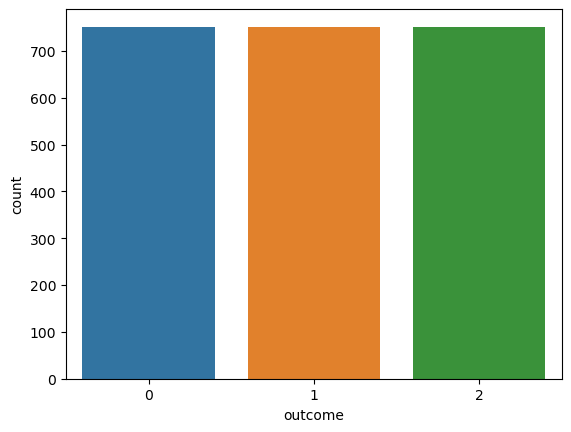

In [3726]:
sns.countplot(x=y_resampled)

## 6 ) Feature Selection

In [3727]:
feature_names=X.columns
num_features=len(X.columns)


In [3728]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rectal_temp             1531 non-null   float64
 1   pulse                   1531 non-null   float64
 2   respiratory_rate        1531 non-null   float64
 3   nasogastric_reflux_ph   1531 non-null   float64
 4   packed_cell_volume      1531 non-null   float64
 5   total_protein           1531 non-null   float64
 6   abdomo_protein          1531 non-null   float64
 7   Frequency               1531 non-null   float64
 8   surgery                 1531 non-null   int64  
 9   nasogastric_reflux      1531 non-null   int64  
 10  surgical_lesion         1531 non-null   int32  
 11  cp_data                 1531 non-null   int32  
 12  circulatory_shock       1531 non-null   int64  
 13  dehydrated              1531 non-null   int64  
 14  painful_lesions         1531 non-null   

[0.02522229 0.0985905  0.01814837 0.08904604 0.05360223 0.11497595
 0.05121687 0.02535999 0.01305669 0.00497925 0.03190282 0.00377524
 0.00179811 0.00354861 0.00073059 0.00278978 0.02136234 0.00164833
 0.02450341 0.05943425 0.03674    0.01533954 0.00795576 0.01793636
 0.00307926 0.00371492 0.00076979 0.01544374 0.00211718 0.00302993
 0.00693883 0.0375704  0.00564955 0.1780403  0.0199828 ]


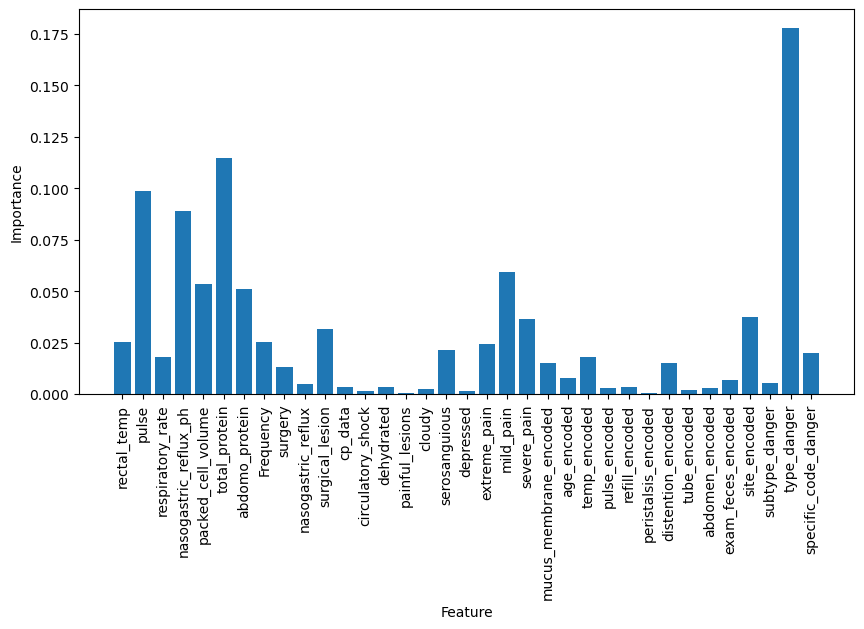

In [3729]:

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X, y)

importances = gb.feature_importances_
print(importances)

plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances)
plt.xticks(range(num_features), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

[0.04700452 0.14147317 0.04411132 0.04761901 0.0522464  0.09884818
 0.06147055 0.04982969 0.00946809 0.00939489 0.00845302 0.00649456
 0.00181549 0.00366559 0.00315729 0.00744453 0.00987852 0.00434098
 0.01299618 0.0505712  0.02190041 0.02667073 0.00707092 0.01509022
 0.00771094 0.00809943 0.00762211 0.01667707 0.01123376 0.01150222
 0.01230717 0.02998037 0.00782304 0.1200856  0.02594282]


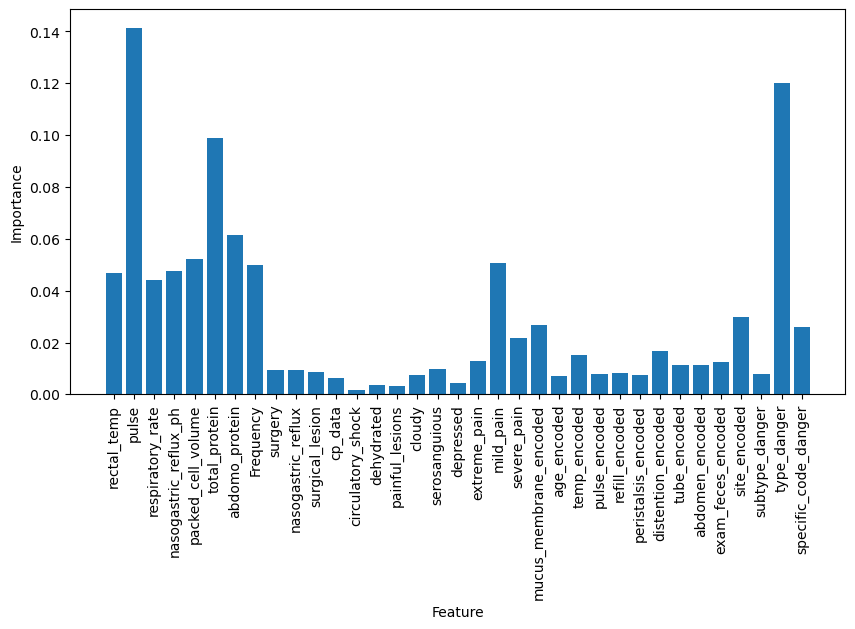

In [3730]:

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

importances = rf.feature_importances_
print(importances)

plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances)
plt.xticks(range(num_features), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [3732]:
selected=['nasogastric_reflux','mild_pain','extreme_pain','exam_feces_encoded','rectal_temp','pulse','nasogastric_reflux_ph','packed_cell_volume','total_protein','Frequency','peristalsis_encoded','refill_encoded','abdomen_encoded','type_danger','site_encoded','specific_code_danger','mucus_membrane_encoded']

In [3733]:
x.columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein', 'Frequency',
       'surgery', 'nasogastric_reflux', 'surgical_lesion', 'cp_data',
       'outcome', 'circulatory_shock', 'dehydrated', 'painful_lesions',
       'cloudy', 'serosanguious', 'depressed', 'extreme_pain', 'mild_pain',
       'severe_pain', 'mucus_membrane_encoded', 'age_encoded', 'temp_encoded',
       'pulse_encoded', 'refill_encoded', 'peristalsis_encoded',
       'distention_encoded', 'tube_encoded', 'abdomen_encoded',
       'exam_feces_encoded', 'site_encoded', 'subtype_danger', 'type_danger',
       'specific_code_danger'],
      dtype='object')

In [3734]:
X= x[selected]
y = x['outcome']
x = x.drop('outcome', axis=1)

In [3735]:

# Separate the target variable from the input features

# Create a PCA object with the desired number of components
pca = PCA(n_components=17)

# Fit the PCA model on the input features
pca.fit(x)

# Transform the input features into the new reduced feature space
X_pca = pca.transform(x)
# X_pca_test = pca.transform(X)
# Print the explained variance ratio of each component
print(pca.explained_variance_ratio_)

# Print the shape of the original and transformed datasets
print("Original dataset shape:", x.shape)
print("Transformed dataset shape:", X_pca.shape)


[0.30613268 0.12378962 0.07221288 0.06003395 0.05547858 0.04223633
 0.03785187 0.0311827  0.03019207 0.02626826 0.02420921 0.02157004
 0.01987866 0.01781251 0.01698173 0.01557657 0.01436763]
Original dataset shape: (1531, 35)
Transformed dataset shape: (1531, 17)


We've applied two different feature selection methods: one manually and the other using Principal Component Analysis (PCA). Now, let's assess which set of features yields the highest accuracy

## 8 ) Models

In [3736]:
model= []
accuracy = []
accuracy_pca = []

In [3737]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [3738]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)

### 8.1 ) Decision Tree

In [3739]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

#Confusion Matrix
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("F1': {}".format(f1))
print("accuracy of DT': {}".format(accuracy_score(y_pred,y_test)))
model.append("DT")
accuracy.append(accuracy_score(y_pred,y_test)) 
print(conf_mat)

Precision: 0.63
Recall: 0.64
F1': 0.6361451766998959
accuracy of DT': 0.6840390879478827
[[ 52  15  26]
 [ 18  31   6]
 [ 15  17 127]]


In [3740]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_pca,y_train_pca)

#Confusion Matrix
y_pred = dec_tree.predict(X_test_pca)
conf_mat = confusion_matrix(y_test_pca,y_pred)
f1 = f1_score(y_test_pca, y_pred, average='macro')
precision = precision_score(y_test_pca, y_pred, average='macro')
recall = recall_score(y_test_pca, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("F1': {}".format(f1))
print("accuracy of DT': {}".format(accuracy_score(y_pred,y_test_pca)))
accuracy_pca.append(accuracy_score(y_pred,y_test_pca)) 
print(conf_mat)

Precision: 0.55
Recall: 0.55
F1': 0.5477800210803322
accuracy of DT': 0.5798045602605864
[[60  8 29]
 [16 24 21]
 [35 20 94]]


### 8.2 ) Logistic Regression

In [3741]:

lreg = LogisticRegression()
lreg.fit(X_train,y_train) 

#Confusion Matrix
y_pred = lreg.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("F1': {}".format(f1))
print("Logistic Regression Accuracy {}".format(accuracy_score(y_pred,y_test)))
model.append("Logistic Regression")
accuracy.append(accuracy_score(y_pred,y_test))

Precision: 0.71
Recall: 0.67
F1': 0.679999605081108
Logistic Regression Accuracy 0.7198697068403909


In [3742]:
lreg = LogisticRegression()
lreg.fit(X_train_pca,y_train_pca) 

#Confusion Matrix
y_pred = lreg.predict(X_test_pca)
conf_mat = confusion_matrix(y_test_pca,y_pred)
f1 = f1_score(y_test_pca, y_pred, average='macro')
precision = precision_score(y_test_pca, y_pred, average='macro')
recall = recall_score(y_test_pca, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("F1': {}".format(f1))
print("Logistic Regression Accuracy {}".format(accuracy_score(y_pred,y_test_pca)))
accuracy_pca.append(accuracy_score(y_pred,y_test_pca))

Precision: 0.69
Recall: 0.65
F1': 0.6603693465153646
Logistic Regression Accuracy 0.6840390879478827


### 8.3 ) Random Forest

In [3743]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=101)
rand_forest.fit(X_train,y_train)

#Confusion Matrix
y_pred = rand_forest.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("F1': {}".format(f1))
print("accuracy of RF': {}".format(accuracy_score(y_pred,y_test)))
model.append("RF")
accuracy.append(accuracy_score(y_pred,y_test)) 
print(conf_mat)

Precision: 0.73
Recall: 0.72
F1': 0.7290977008090455
accuracy of RF': 0.755700325732899
[[ 64   5  24]
 [ 12  36   7]
 [ 17  10 132]]


In [3744]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=101)
rand_forest.fit(X_train_pca,y_train_pca)

#Confusion Matrix
y_pred = rand_forest.predict(X_test_pca)
conf_mat = confusion_matrix(y_test_pca,y_pred)
f1 = f1_score(y_test_pca, y_pred, average='macro')
precision = precision_score(y_test_pca, y_pred, average='macro')
recall = recall_score(y_test_pca, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("F1': {}".format(f1))
print("accuracy of RF': {}".format(accuracy_score(y_pred,y_test_pca)))
accuracy_pca.append(accuracy_score(y_pred,y_test_pca)) 
print(conf_mat)

Precision: 0.68
Recall: 0.66
F1': 0.6600544148894546
accuracy of RF': 0.6840390879478827
[[ 74   3  20]
 [ 13  30  18]
 [ 32  11 106]]


### 8.4 ) XGB

In [3745]:
# Fitting XGB Classification to the Training set
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = xgb_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("F1': {}".format(f1))
#Validation
print("accuracy of XGB': {}".format(accuracy_score(y_pred,y_test)))


model.append("XGB")
accuracy.append(accuracy_score(y_pred,y_test))

Precision: 0.75
Recall: 0.73
F1': 0.7388254700961333
accuracy of XGB': 0.758957654723127


In [3746]:
# Fitting XGB Classification to the Training set
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train_pca,y_train_pca)

# Predicting the Test set results
y_pred = xgb_classifier.predict(X_test_pca)
f1 = f1_score(y_test_pca, y_pred, average='macro')
precision = precision_score(y_test_pca, y_pred, average='macro')
recall = recall_score(y_test_pca, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("F1': {}".format(f1))
#Validation
print("accuracy of XGB': {}".format(accuracy_score(y_pred,y_test_pca)))
accuracy_pca.append(accuracy_score(y_pred,y_test_pca))

Precision: 0.66
Recall: 0.63
F1': 0.6373268905837953
accuracy of XGB': 0.6742671009771987


### 8.4 ) Cat Boost Classifier

In [3747]:

# Create and fit CatBoost Classifier for multi-class classification
catboost_classifier = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='MultiClass')
catboost_classifier.fit(X_train,y_train)

# Predict on the test set
y_pred = catboost_classifier.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')


# Print and store model name and accuracy score
model_name = "CatBoost"
model.append(model_name)
accuracy.append(accuracy_score(y_pred,y_test))# Print evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("accuracy of catboost': {}".format(accuracy_score(y_pred,y_test)))


0:	learn: 1.0731106	total: 25.8ms	remaining: 12.9s
1:	learn: 1.0533122	total: 50.2ms	remaining: 12.5s
2:	learn: 1.0327683	total: 74.5ms	remaining: 12.3s
3:	learn: 1.0157176	total: 98ms	remaining: 12.2s
4:	learn: 0.9949446	total: 121ms	remaining: 12s
5:	learn: 0.9784700	total: 202ms	remaining: 16.7s
6:	learn: 0.9651430	total: 226ms	remaining: 15.9s
7:	learn: 0.9493860	total: 250ms	remaining: 15.4s
8:	learn: 0.9344861	total: 275ms	remaining: 15s
9:	learn: 0.9200750	total: 301ms	remaining: 14.7s
10:	learn: 0.9072143	total: 324ms	remaining: 14.4s
11:	learn: 0.8927825	total: 351ms	remaining: 14.3s
12:	learn: 0.8818361	total: 375ms	remaining: 14s
13:	learn: 0.8704708	total: 399ms	remaining: 13.9s
14:	learn: 0.8588794	total: 425ms	remaining: 13.7s
15:	learn: 0.8472328	total: 448ms	remaining: 13.6s
16:	learn: 0.8359080	total: 471ms	remaining: 13.4s
17:	learn: 0.8260514	total: 495ms	remaining: 13.2s
18:	learn: 0.8153287	total: 520ms	remaining: 13.2s
19:	learn: 0.8045725	total: 544ms	remaining: 

In [3748]:

# # Create and fit CatBoost Classifier for multi-class classification
# catboost_classifier = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='MultiClass')
# catboost_classifier.fit(X_train_pca,y_train_pca)

# # Predict on the test set
# y_pred = catboost_classifier.predict(X_test_pca)

# # Calculate evaluation metrics
# f1 = f1_score(y_test_pca, y_pred, average='macro')
# precision = precision_score(y_test_pca, y_pred, average='macro')
# recall = recall_score(y_test_pca, y_pred, average='macro')

# # Calculate accuracy
# # accuracy = accuracy_score(y_test, y_pred)

# # Print and store model name and accuracy score
# model_name = "CatBoost"
# accuracy_pca.append(accuracy_score(y_pred,y_test_pca))# Print evaluation metrics
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print("accuracy of catboost': {}".format(accuracy_score(y_pred,y_test_pca)))


### 8.5 ) lightgbm

In [3749]:

# Create and fit LightGBM Classifier for multi-class classification
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.05, n_estimators=100, objective='multiclass', num_class=3)

lgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = lgb_classifier.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print and store model name and accuracy score
model_name = "LightGBM"
model.append(model_name)
accuracy.append(accuracy_score(y_pred,y_test))# Print evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("accuracy of lightgbm': {}".format(accuracy_score(y_pred,y_test)))



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 1224, number of used features: 17
[LightGBM] [Info] Start training from score -1.136070
[LightGBM] [Info] Start training from score -1.637609
[LightGBM] [Info] Start training from score -0.724685
Precision: 0.79
Recall: 0.75
F1 Score: 0.76
accuracy of lightgbm': 0.7850162866449512


In [3750]:

# # Create and fit LightGBM Classifier for multi-class classification
# lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.05, n_estimators=100, objective='multiclass', num_class=3)

# lgb_classifier.fit(X_train_pca,y_train_pca)

# # Predict on the test set
# y_pred = lgb_classifier.predict(X_test_pca)

# # Calculate evaluation metrics
# f1 = f1_score(y_test_pca, y_pred, average='macro')
# precision = precision_score(y_test_pca, y_pred, average='macro')
# recall = recall_score(y_test_pca, y_pred, average='macro')

# # Print and store model name and accuracy score
# model_name = "LightGBM"
# accuracy_pca.append(accuracy_score(y_pred,y_test_pca))# Print evaluation metrics
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print("accuracy of lightgbm': {}".format(accuracy_score(y_pred,y_test_pca)))



## 9 ) creating an accurecy table

In [3751]:
# plt.figure(figsize= (10,10))
# plt.plot(model, accuracy, 'r*-') # 'r' is the color red
# plt.xlabel('model')
# plt.ylabel('accuracy')
# plt.title('Coclusion')

In [3752]:
model2=model
sorted_accuracy_values, sorted_model_names = zip(*sorted(zip(accuracy, model), reverse=True))
best_three_models = sorted_model_names[:3]
best_three_accuracy = sorted_accuracy_values[:3]

In [3753]:

# plt.figure(figsize=(10, 6))
# plt.bar(sorted_model_names, sorted_accuracy_values, color='skyblue')
# plt.xlabel('Multi-class classification Models')
# plt.ylabel('Accuracy)')
# plt.title('Model Performance Comparison')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()


In [3754]:
print("Best Three Models:")
for model, accuracy in zip(best_three_models, best_three_accuracy):
    print(f"{model}: Accuracy = {accuracy}")

Best Three Models:
LightGBM: Accuracy = 0.7850162866449512
XGB: Accuracy = 0.758957654723127
RF: Accuracy = 0.755700325732899


In [3755]:
# plt.figure(figsize= (10,10))
# plt.plot(model2, accuracy_pca, 'r*-') # 'r' is the color red
# plt.xlabel('model')
# plt.ylabel('Accuracy')
# plt.title('Coclusion')

In [3756]:
# sorted_accuracy_values, sorted_model_names = zip(*sorted(zip(accuracy_pca, model2), reverse=True))
# best_three_models = sorted_model_names[:3]
# best_three_accuracy = sorted_accuracy_values[:3]

# plt.figure(figsize=(10, 6))
# plt.bar(sorted_model_names, sorted_accuracy_values, color='skyblue')
# plt.xlabel('Multi-class classification Models')
# plt.ylabel('Accuracy)')
# plt.title('Model Performance Comparison')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()


In [3757]:
# print("Best Three Models:")
# for model, accuracy in zip(best_three_models, best_three_accuracy):
#     print(f"{model}: Accuracy = {accuracy}")

It appears that the manually selected features are yielding improved accuracy for the model. This suggests that the process of carefully choosing specific features, based on domain knowledge and problem understanding, has resulted in enhanced model performance

## 9)  Hyperparameter Tuning for best models

### 9.1 ) Random Forest

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rand_forest = RandomForestClassifier(random_state=101)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    rand_forest,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings to sample
    scoring='accuracy',  # You can use other scoring metrics as needed
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores for parallelization
)

# Fit the RandomizedSearchCV to your training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_random_forest = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on your test data
y_pred = best_random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


### 9.2 ) XGBoost

In [ ]:

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 2, 3]
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings to sample
    scoring='accuracy',  # You can use other scoring metrics as needed
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores for parallelization
)

# Fit the RandomizedSearchCV to your training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_xgb_classifier = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on your test data
y_pred = best_xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


### 9.3 ) CatBoost

In [ ]:
# Define the parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'loss_function': ['MultiClass'],
    'auto_class_weights': ['Balanced', 'None']
}

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    catboost_classifier,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings to sample
    scoring='accuracy',  # You can use other scoring metrics as needed
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores for parallelization
)

# Fit the RandomizedSearchCV to your training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_catboost_classifier = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on your test data
y_pred = best_catboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


### 9.4 ) LightGBM classifier

In [ ]:
# Define the hyperparameter grid for LightGBM
param_grid = {
 'boosting_type': ['gbdt'],
    'num_leaves': [31, 50, 100],                 # Additional values for 'num_leaves'
    'max_depth': [-1, 5, 10, 15],               # Additional values for 'max_depth'
    'learning_rate': [0.05, 0.1, 0.2],   
    'subsample': [0.7, 0.8, 0.9, 1.0],
        'n_estimators': [100, 200, 300, 400],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
}


# Create a LightGBM classifier
lgb_classifier = LGBMClassifier(random_state=101)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    lgb_classifier,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings to sample
    scoring='accuracy',  # You can use other scoring metrics as needed
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores for parallelization
)

# Fit the RandomizedSearchCV to your training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_lgb_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on your test data
y_pred = best_lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

## 10 )  Prepare test data

In [ ]:
test=pd.read_csv('Predict Health Outcomes of Horses_test.csv',na_values="None")

Id=test['id']
test = test.drop('id', axis=1)
test['lesion_1'] = test['lesion_1'].astype(str)
site_mapping = {
    '1': 'Gastric',
    '2': 'Small Intestine',
    '3': 'Large Colon',
    '4': 'Large Colon and Cecum',
    '5': 'Cecum',
    '6': 'Transverse Colon',
    '7': 'Rectum/Descending Colon',
    '8': 'Uterus',
    '9': 'Bladder',
    '11': 'All Intestinal Sites',
    '00': 'None',
}

type_mapping = {
    '1': 'Simple',
    '2': 'Strangulation',
    '3': 'Inflammation',
    '4': 'Other',
}

subtype_mapping = {
    '1': 'Mechanical',
    '2': 'Paralytic',
    '0': 'N/A',
}

specific_mapping = {
    '1': 'Obturation',
    '2': 'Intrinsic',
    '3': 'Extrinsic',
    '4': 'Adynamic',
    '5': 'Volvulus/Torsion',
    '6': 'Intussuption',
    '7': 'Thromboembolic',
    '8': 'Hernia',
    '9': 'Lipoma/Splenic Incarceration',
    '10': 'Displacement',
    '0': 'N/A',
}
# Translate the 'lesion_1' column using the dictionaries
test['site'] = test['lesion_1'].str[0].map(site_mapping)
test['type'] = test['lesion_1'].str[1].map(type_mapping)
test['subtype'] = test['lesion_1'].str[2].map(subtype_mapping)
test['specific_code'] = test['lesion_1'].str[3].map(specific_mapping)
columns_to_drop = ['lesion_1', 'lesion_2','lesion_3']
test = test.drop(columns=columns_to_drop, axis=1)


In [ ]:
test['Frequency'] = test['hospital_number'].map(test['hospital_number'].value_counts())
test = test.drop('hospital_number', axis=1)

In [ ]:
test['circulatory_shock'] = (test['pulse'] > 50) & (test['packed_cell_volume'] > 50)
test['dehydrated'] = (test['total_protein'] > 7.5) & (test['packed_cell_volume'] > 50)
test['painful_lesions'] = (test['pulse'] > 50) & (test['packed_cell_volume'] < 50)

In [3523]:
num=['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein', 'Frequency']
te=test[num]
te[te.isnull()] = np.nan
# Perform KNN regression imputation
knn_imputer = KNN(k=5)  # You can adjust the number of neighbors (k) as needed
te_imputed = knn_imputer.fit_transform(te)

# Convert the result back to a DataFrame (if necessary)
te = pd.DataFrame(te_imputed, columns=te.columns)
test[num]=te

Imputing row 1/824 with 0 missing, elapsed time: 0.066
Imputing row 101/824 with 0 missing, elapsed time: 0.067
Imputing row 201/824 with 0 missing, elapsed time: 0.067
Imputing row 301/824 with 0 missing, elapsed time: 0.067
Imputing row 401/824 with 0 missing, elapsed time: 0.067
Imputing row 501/824 with 0 missing, elapsed time: 0.067
Imputing row 601/824 with 0 missing, elapsed time: 0.068
Imputing row 701/824 with 0 missing, elapsed time: 0.068
Imputing row 801/824 with 0 missing, elapsed time: 0.068


C:\Users\ehabe\anacond\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [3524]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                824 non-null    object 
 1   age                    824 non-null    object 
 2   rectal_temp            824 non-null    float64
 3   pulse                  824 non-null    float64
 4   respiratory_rate       824 non-null    float64
 5   temp_of_extremities    789 non-null    object 
 6   peripheral_pulse       777 non-null    object 
 7   mucous_membrane        811 non-null    object 
 8   capillary_refill_time  818 non-null    object 
 9   pain                   795 non-null    object 
 10  peristalsis            805 non-null    object 
 11  abdominal_distention   802 non-null    object 
 12  nasogastric_tube       760 non-null    object 
 13  nasogastric_reflux     810 non-null    object 
 14  nasogastric_reflux_ph  824 non-null    float64
 15  rectal

In [3525]:

# Create a StandardScaler instance
scaler = StandardScaler()

# Select the numerical columns from the DataFrame
numerical_columns = test[num]

# Fit and transform the scaler on the selected columns
normalized_numerical_columns = scaler.fit_transform(numerical_columns)

# Replace the original columns with the normalized values
test[num] = normalized_numerical_columns



In [3526]:
test['temp_of_extremities'].fillna(df['temp_of_extremities'].mode()[0], inplace=True)
test['mucous_membrane'].fillna(df['mucous_membrane'].mode()[0], inplace=True)
test['peripheral_pulse'].fillna(df['peripheral_pulse'].mode()[0], inplace=True)
test['capillary_refill_time'].fillna(df['capillary_refill_time'].mode()[0], inplace=True)
test['pain'].fillna(df['pain'].mode()[0], inplace=True)
test['peristalsis'].fillna(df['peristalsis'].mode()[0], inplace=True)
test['abdominal_distention'].fillna(df['abdominal_distention'].mode()[0], inplace=True)
test['nasogastric_tube'].fillna(df['nasogastric_tube'].mode()[0], inplace=True)
test['rectal_exam_feces'].fillna(df['rectal_exam_feces'].mode()[0], inplace=True)
test['nasogastric_reflux'].fillna(df['nasogastric_reflux'].mode()[0], inplace=True)
test['abdomen'].fillna(df['abdomen'].mode()[0], inplace=True)
test['abdomo_appearance'].fillna(df['abdomo_appearance'].mode()[0], inplace=True)
test['site'].fillna(df['site'].mode()[0], inplace=True)
test['type'].fillna('other', inplace=True)
test['subtype'].fillna('other', inplace=True)
test['specific_code'].fillna('other', inplace=True)

In [3527]:
test['pain'].value_counts()

depressed       339
mild_pain       255
severe_pain     115
extreme_pain     82
alert            32
moderate          1
Name: pain, dtype: int64

In [3528]:


abdomo_appearance=pd.get_dummies(test["abdomo_appearance"])
abdomo_appearance = abdomo_appearance.drop('clear', axis=1)
test=pd.concat([test,abdomo_appearance],axis=1)
test = test.drop('abdomo_appearance', axis=1)


pain=pd.get_dummies(test["pain"])
pain = pain.drop('alert', axis=1)
pain = pain.drop('moderate', axis=1)
test=pd.concat([test,pain],axis=1)
test = test.drop('pain', axis=1)



In [3529]:

test["age_encoded"] = age_label.fit_transform(test[["age"]])
test = test.drop('age', axis=1)


test["temp_encoded"] = temp_label.fit_transform(test[["temp_of_extremities"]])
test = test.drop('temp_of_extremities', axis=1)

test["pulse_encoded"] = pulse_label.fit_transform(test[["peripheral_pulse"]])
test = test.drop('peripheral_pulse', axis=1)

test["refill_encoded"] = refill_label.fit_transform(test[["capillary_refill_time"]])
test = test.drop('capillary_refill_time', axis=1)

# test["pain_encoded"] = pain_label.fit_transform(test[["pain"]])
# test = test.drop('pain', axis=1)





# Fit and transform the "mucus_membrane" column
test["mucus_membrane_encoded"] = mucus_membrane_label.fit_transform(test[["mucous_membrane"]])
test = test.drop('mucous_membrane', axis=1)





# Fit and transform the "peristalsis" column
test["peristalsis_encoded"] = peristalsis_label.fit_transform(test[["peristalsis"]])
test = test.drop('peristalsis', axis=1)

test["distention_encoded"] = distention_label.fit_transform(test[["abdominal_distention"]])
test = test.drop('abdominal_distention', axis=1)

test["tube_encoded"] = tube_label.fit_transform(test[["nasogastric_tube"]])
test = test.drop('nasogastric_tube', axis=1)


test["exam_feces_encoded"] = exam_feces_label.fit_transform(test[["rectal_exam_feces"]])
test = test.drop('rectal_exam_feces', axis=1)

test["abdomen_encoded"] = abdomen_label.fit_transform(test[["abdomen"]])
test = test.drop('abdomen', axis=1)



In [3530]:
# Define a custom mapping of categories to danger levels
reflux_mapping = {
    'none': 0,
    'slight': 0,
    'less_1_liter': 1,
    'more_1_liter': 2,

}

# Map the "site" column using the custom mapping
test['nasogastric_reflux'] = test['nasogastric_reflux'].map(reflux_mapping)


In [3531]:
# Define a custom mapping of categories to danger levels
danger_mapping = {
    'other': 0,          # No danger
    'Inflammation': 1,  # Low danger
    'Simple': 2,        # Moderate danger
    'Strangulation': 3, # High danger
    'Other': 4          # Extreme danger
}

# Map the "type" column using the custom mapping
test['type_danger'] = test['type'].map(danger_mapping)
test = test.drop('type', axis=1)


# Define a custom mapping of categories to danger levels
danger_mapping = {
    'other':0,
    'N/A': 0,                         # No danger
    'Adynamic': 1,                    # Low danger
    'Intrinsic': 2,                   # Moderate danger
    'Extrinsic': 3,                   # High danger
    'Thromboembolic': 4,              # Extreme danger
    'Intussuption': 5,                # Extreme danger
    'Lipoma/Splenic Incarceration': 6, # Extreme danger
    'Hernia': 7,                      # Extreme danger
    'Obturation': 8,                  # Extreme danger
    'Volvulus/Torsion': 9             # Extreme danger
}

# Map the "specific_code" column using the custom mapping
test['specific_code_danger'] =test['specific_code'].map(danger_mapping)
test = test.drop('specific_code', axis=1)




# Define a custom mapping of categories to danger levels
danger_mapping = {
    'Gastric': 1,
    'Small Intestine': 2,
    'Large Colon': 3,
    'Large Colon and Cecum': 4,
    'Cecum': 5,
    'Transverse Colon': 6,
    'Rectum/Descending Colon': 7,
    'Uterus': 8,
    'Bladder': 9
}

# Map the "site" column using the custom mapping
test['site_encoded'] = test['site'].map(danger_mapping)
test = test.drop('site', axis=1)





# Define a custom mapping of categories to danger levels
danger_mapping = {
    'other':0,
    'N/A': 0,        # No danger
    'Mechanical': 2,  # Moderate danger
    'Paralytic': 3    # High danger
}

# Map the "subtype" column using the custom mapping
test['subtype_danger'] =test['subtype'].map(danger_mapping)
test = test.drop('subtype', axis=1)

In [3532]:
label_encoder = LabelEncoder()

# Fit and transform the boolean column
test['cp_data'] = label_encoder.fit_transform(test['cp_data'])

test['surgery'] = label_encoder.fit_transform(test['surgery'])
test['circulatory_shock'] = label_encoder.fit_transform(test['circulatory_shock'])
test['dehydrated'] = label_encoder.fit_transform(test['dehydrated'])
test['painful_lesions'] = label_encoder.fit_transform(test['painful_lesions'])


In [3533]:
X_test = test[X.columns]

In [3534]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nasogastric_reflux      824 non-null    int64  
 1   cloudy                  824 non-null    uint8  
 2   mild_pain               824 non-null    uint8  
 3   extreme_pain            824 non-null    uint8  
 4   exam_feces_encoded      824 non-null    float64
 5   rectal_temp             824 non-null    float64
 6   pulse                   824 non-null    float64
 7   nasogastric_reflux_ph   824 non-null    float64
 8   packed_cell_volume      824 non-null    float64
 9   total_protein           824 non-null    float64
 10  Frequency               824 non-null    float64
 11  peristalsis_encoded     824 non-null    float64
 12  refill_encoded          824 non-null    float64
 13  abdomen_encoded         824 non-null    float64
 14  type_danger             824 non-null    in

## 11 ) Applying best Models on the whole dataset


### 11.1 ) Cat Boost Classifier

In [1053]:

# Define the best hyperparameters
best_params = {
    'loss_function': 'MultiClass',
    'learning_rate': 0.1,
    'l2_leaf_reg': 3,
    'iterations': 200,
    'depth': 8,
    'auto_class_weights': None  # Corrected 'None' to None
}

# Create a CatBoost classifier with the best hyperparameters
catboost_classifier = CatBoostClassifier(**best_params)

# Perform cross-validation
cv_scores = cross_val_score(catboost_classifier, X, y, cv=5)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cv_scores.mean()
std_deviation = cv_scores.std()

print(f"Mean CV Score: {mean_score:.4f}")
print(f"Standard Deviation of CV Scores: {std_deviation:.4f}")

# Optionally, you can fit the model to the entire training data if you want
catboost_classifier.fit(X, y)

# Predict on the test set
y_pred = catboost_classifier.predict(X_test)


0:	learn: 1.0409719	total: 2.58ms	remaining: 514ms
1:	learn: 0.9947827	total: 10.2ms	remaining: 1.01s
2:	learn: 0.9580525	total: 17.6ms	remaining: 1.15s
3:	learn: 0.9240725	total: 24.8ms	remaining: 1.21s
4:	learn: 0.8972958	total: 31.9ms	remaining: 1.24s
5:	learn: 0.8672686	total: 39.2ms	remaining: 1.27s
6:	learn: 0.8412849	total: 46.3ms	remaining: 1.28s
7:	learn: 0.8173918	total: 53.6ms	remaining: 1.28s
8:	learn: 0.7972017	total: 60.9ms	remaining: 1.29s
9:	learn: 0.7817414	total: 67.9ms	remaining: 1.29s
10:	learn: 0.7658423	total: 74.9ms	remaining: 1.29s
11:	learn: 0.7502862	total: 82.9ms	remaining: 1.3s
12:	learn: 0.7345292	total: 90ms	remaining: 1.29s
13:	learn: 0.7190003	total: 97.3ms	remaining: 1.29s
14:	learn: 0.7061576	total: 104ms	remaining: 1.29s
15:	learn: 0.6954076	total: 112ms	remaining: 1.28s
16:	learn: 0.6821930	total: 119ms	remaining: 1.28s
17:	learn: 0.6722228	total: 126ms	remaining: 1.27s
18:	learn: 0.6621181	total: 133ms	remaining: 1.26s
19:	learn: 0.6522839	total: 14

In [1054]:

# Create a CatBoost classifier with the best hyperparameters
catboost_classifier = CatBoostClassifier(**best_params)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    catboost_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

# Customize the plot
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


KeyboardInterrupt: 

In [ ]:
y_pred = y_pred.flatten()
results_catboost = pd.DataFrame({'id': Id, 'outcome':y_pred})

In [ ]:
# Create the reverse mapping dictionary
outcome_mapping = {
    0: 'died',
    1: 'euthanized',
    2: 'lived',
}

# Create a new column 'decoded_outcome' by mapping the encoded values to their original labels
results_catboost['outcome'] = results_catboost['outcome'].map(outcome_mapping)
results_catboost.to_csv('Predict_Health_Outcomes_of_Horses_catboost_classifier.csv', index=False)

In [ ]:
results_catboost.info()

### 11.2 ) XGBoost

In [123]:

# Define the best hyperparameters
best_params = {
    'subsample': 1.0,
    'scale_pos_weight': 2,
    'n_estimators': 200,
    'min_child_weight': 1,
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.9
}

# Create an XGBoost classifier with the best hyperparameters
xgb_classifier = xgb.XGBClassifier(**best_params)

# Perform cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y, cv=5)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cv_scores.mean()
std_deviation = cv_scores.std()

print(f"Mean CV Score: {mean_score:.4f}")
print(f"Standard Deviation of CV Scores: {std_deviation:.4f}")

# Optionally, you can fit the model to the entire training data if you want
xgb_classifier.fit(X, y)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)


[23:56:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[23:56:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[23:56:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[23:56:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[23:56:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale

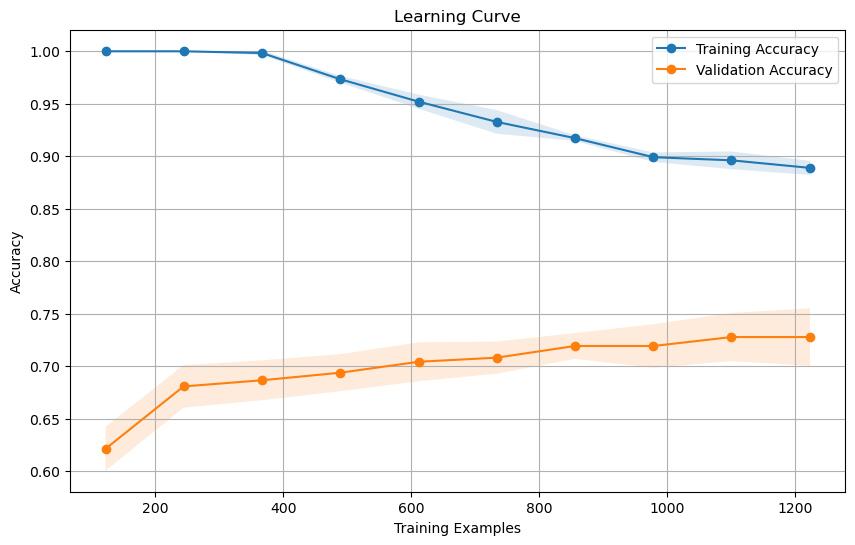

In [124]:
# Define the best hyperparameters
best_params = {
    'subsample': 1.0,
    'scale_pos_weight': 2,
    'n_estimators': 200,
    'min_child_weight': 1,
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.9
}

# Create an XGBoost classifier with the best hyperparameters
xgb_classifier = xgb.XGBClassifier(**best_params)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

# Customize the plot
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


In [125]:
y_pred = y_pred.flatten()
results_XGB = pd.DataFrame({'id': Id, 'outcome':y_pred})

In [126]:
# Create the reverse mapping dictionary
outcome_mapping = {
    0: 'died',
    1: 'euthanized',
    2: 'lived',
}

# Create a new column 'decoded_outcome' by mapping the encoded values to their original labels
results_XGB['outcome'] = results_XGB['outcome'].map(outcome_mapping)
results_XGB.to_csv('Predict_Health_Outcomes_of_Horses_xgb_classifier.csv', index=False)

In [127]:
results_XGB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       824 non-null    int64 
 1   outcome  824 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### 11.3 ) Random Forest Classifier

In [128]:
# Define the best hyperparameters
rf_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 10,
    'bootstrap': True
}

# Create a Random Forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(**rf_params)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(cv_scores)
std_deviation = np.std(cv_scores)

print(f"Mean CV Score: {mean_score:.4f}")
print(f"Standard Deviation of CV Scores: {std_deviation:.4f}")

# Optionally, you can fit the model to the entire training data if you want
rf_classifier.fit(X, y)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)


Cross-Validation Scores: [0.69381107 0.7124183  0.7124183  0.73856209 0.7254902 ]
Mean CV Score: 0.7165
Standard Deviation of CV Scores: 0.0149


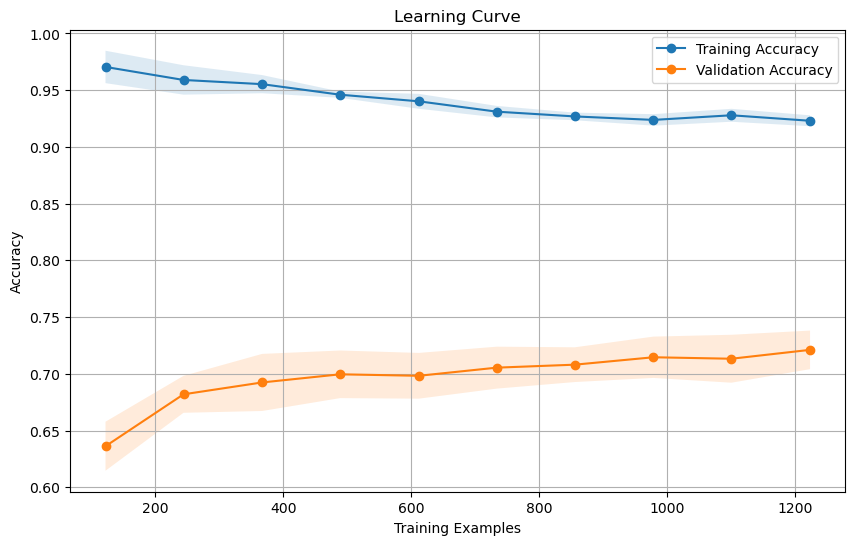

In [129]:

# Define the best hyperparameters
rf_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 10,
    'bootstrap': True
}

# Create a Random Forest classifier with the specified hyperparameters
rf_classifier = RandomForestClassifier(**rf_params)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

# Customize the plot
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


In [130]:
y_pred = y_pred.flatten()
results_RF = pd.DataFrame({'id': Id, 'outcome':y_pred})


In [131]:
# Create the reverse mapping dictionary
outcome_mapping = {
    0: 'died',
    1: 'euthanized',
    2: 'lived',
}

# Create a new column 'decoded_outcome' by mapping the encoded values to their original labels
results_RF['outcome'] = results_RF['outcome'].map(outcome_mapping)
results_RF.to_csv('Predict_Health_Outcomes_of_Horses_rf_classifier.csv', index=False)

In [132]:
results_RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       824 non-null    int64 
 1   outcome  824 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### 11.4 ) LightGBM Classifier

In [3535]:

# Define the best hyperparameters for LightGBM
lgb_params = {
    'subsample': 0.8,
    'num_leaves': 100,
    'n_estimators': 100,
    'max_depth': 10,
    'learning_rate': 0.05,
    'colsample_bytree': 0.8,
    'boosting_type': 'gbdt',
    'objective': 'multiclass',  # Specify multiclass classification
    'num_class': 3  # Replace 'num_classes' with the actual number of classes
}

# Create a LightGBM multiclass classifier with the best hyperparameters
lgb_classifier = lgb.LGBMClassifier(**lgb_params)

# Perform cross-validation
cv_scores = cross_val_score(lgb_classifier, X, y, cv=5, scoring='accuracy')  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(cv_scores)
std_deviation = np.std(cv_scores)

print(f"Mean CV Score: {mean_score:.4f}")
print(f"Standard Deviation of CV Scores: {std_deviation:.4f}")

# Optionally, you can fit the model to the entire training data if you want
lgb_classifier.fit(X, y)

# Predict on the test set
y_pred = lgb_classifier.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 1224, number of used features: 18
[LightGBM] [Info] Start training from score -1.148874
[LightGBM] [Info] Start training from score -1.650294
[LightGBM] [Info] Start training from score -0.711285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

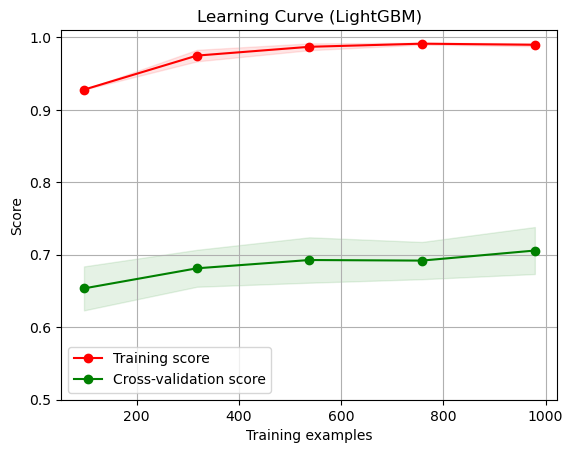

In [3536]:
# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv, ylim=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes,
        test_scores_mean,
        "o-",
        color="g",
        label="Cross-validation score",
    )

    plt.legend(loc="best")
    return plt

# Plot the learning curve for your best LightGBM model
title = "Learning Curve (LightGBM)"
cv = 5  # Number of cross-validation folds
plot_learning_curve(
    lgb_classifier,
    title,
    X_train,
    y_train,
    cv=cv,
    ylim=(0.5, 1.01),  # Adjust ylim as needed
    n_jobs=-1,
)

plt.show()


In [3537]:
y_pred = y_pred.flatten()
results_lF = pd.DataFrame({'id': Id, 'outcome':y_pred})

# Create the reverse mapping dictionary
outcome_mapping = {
    0: 'died',
    1: 'euthanized',
    2: 'lived',
}

# Create a new column 'decoded_outcome' by mapping the encoded values to their original labels
results_lF['outcome'] = results_lF['outcome'].map(outcome_mapping)
results_lF.to_csv('Predict_Health_Outcomes_of_Horses_lf_classifier.csv', index=False)

In [3538]:
results_lF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       824 non-null    int64 
 1   outcome  824 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


###### 